## Introduction ##  

The Objective of the case study is to understand how consumer attributes and 
loan attributes influence the tendency of default in the Online Loan 
marketplace facilitating personal loans, business loans, and 
financing of medical procedures

Loans are either approved or rejected based on certain inputs/criterias. 

The dataset being examined would be expected to have historic data comprising 
of the following broad parameters -

1. Loan Input variables - parameters that are sourced by the lending agency related to the applicant for the loan consideration (Employment details, purpose, etc)
2. Loan characteristics variables - parameters that describe the final output of the loan application (amount of loan, Interest Rate, term, Loan status i.e. Loan Accepted or Rejected, Approved Amount, funded Amount etc)
3. Loan Performance/Transactional variables - parameters that describe the current performance after the loan has been disbursed (loan status - Fully Paid,Charged off, Current; deliquency parameters,Charged-off-Defaulters, revolving balance etc).These variables are not applicable if the loan has been rejected.

Using the above data set we need to - Identify risky loan applicants by 
understanding the KEY driving factors (or driver variables) behind loan default
.i.e. the variables which are strong indicators of default.

Rejecting an application can also result in a financial loss, hence it is 
important to establish a strong corelation between the KEY DRIVING PARAMETERS
resulting in loan defaults.

The following code in this file will help realise this objective. It will
attempt to -

1. Understand the raw data set
2. Data Cleaning and Manipulation
3. Data Analysis - use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

## Table of Contents ##
1. Getting the system ready and loading the data  
2. Understanding the data 
3. Data Cleaning (Missing Values, Redundant columns, Outliers)
3. Exploratory Data Analysis (EDA)  
    i. Univariate Analysis  
    ii. Bivariate Analysis  
5. Recommendations


### 1. Getting the system ready and loading the data

In [1]:
# Import all the libraries required

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px


In [2]:
# Read the CSV file into a dataframe and display the data set
df_ln_trn = pd.read_csv("loan.csv")
df_ln_trn.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### 2. Understanding the data

In [3]:
# Display data set shape (rows and columns)
df_ln_trn.columns
df_ln_trn.shape

(39717, 111)

We have 39717 rows and 111 columns

In [4]:
# Display data types of the columns.
df_ln_trn.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

We can see there are three formats of data types:

-  object: Object format means variables are categorical. 

-  int64:  It represents the integer variables. 

-  float64: It represents the variable that has some decimal values involved. 

In [5]:
# Find the numerical and the categorical features
numerical_feats = df_ln_trn.dtypes[df_ln_trn.dtypes != "object"].index
print("# of Numerical features: " ,len(numerical_feats))

categorical_feats = df_ln_trn.dtypes[df_ln_trn.dtypes == "object"].index
print("# of Categorical features: " ,len(categorical_feats))

# of Numerical features:  87
# of Categorical features:  24


In [6]:
# Display numerical features

print ("Numerical features in our data set are :\n" , numerical_feats)

Numerical features in our data set are :
 Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_c

In [7]:
# Display categorical features
print ("categorical features in our data set are :\n",categorical_feats)

categorical features in our data set are :
 Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type'],
      dtype='object')


Our Target Variable is - <b> loan_status </b>

Let us further understand the content and basic distribution of this variable

In [8]:
# Unique counts for each category in the data set 
df_ln_trn['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [9]:
# To find the proportions of the loan status values
df_ln_trn['loan_status'].value_counts(normalize=True) 

Fully Paid     0.829620
Charged Off    0.141677
Current        0.028703
Name: loan_status, dtype: float64

<AxesSubplot:>

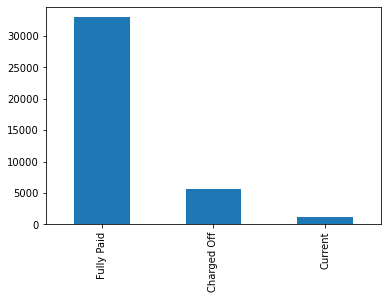

In [10]:
# Visualise the loan status values

df_ln_trn['loan_status'].value_counts().plot.bar()
#df_ln_trn['loan_status'].value_counts(normalize=True).plot.bar()

Of the 39717 applications approved - 

-  About 32950 (around 83%) people fully paid their loan.  
-  About 5627 (around 14%) people defaulted on their loan.  
-  About 1140 (around 2%) people have the loan still open.


In [11]:
# Identify duplicate member records in the data set
df_ln_trn['member_id'].nunique()

# Results: All member ids are unique (39717 of 39717 ). It can be infered that
# there are no duplicate records currently in the data set which needs to be merged

39717

In [12]:
# Check is funded Amount and funded Amount Invested is lower than the 
# loan application amount

check1 = df_ln_trn['funded_amnt'] <= df_ln_trn['loan_amnt']
print(check1.unique())

check2 = df_ln_trn['funded_amnt_inv'] <= df_ln_trn['funded_amnt']
print(check2.unique())

# No data anamoly observed

[ True]
[ True]


### 3. Data Cleaning - Basic

##### Missing Value Treatment

In [13]:
# Identify the null or missing values in the data set

df_ln_trn.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [14]:
# Drop all Columns from the data set where all the values are missing or NA
df_ln_trn.dropna(axis = 1, how = "all",inplace = True)
df_ln_trn.shape

# Result: About 54 columns were dropped, leaving us with 57 columns 
# currently in our data set i.e. a smaller data set from the original

(39717, 57)

In [15]:
# Find the percentage of the missing value data

total = df_ln_trn.isnull().sum().sort_values(ascending=False)
percent = df_ln_trn.isnull().sum()/df_ln_trn.isnull().count().sort_values(ascending=False)

missing_data = pd.concat([total,percent*100], axis = 1, keys = ["Total","Percent"])
missing_data.head(15)


,Total,Percent
next_pymnt_d,38577,97.129693
mths_since_last_record,36931,92.985372
mths_since_last_delinq,25682,64.662487
desc,12940,32.580507
emp_title,2459,6.191303
emp_length,1075,2.706650
pub_rec_bankruptcies,697,1.754916
last_pymnt_d,71,0.178765
chargeoff_within_12_mths,56,0.140998
collections_12_mths_ex_med,56,0.140998


In [16]:
# Dropping columns which have over 60% missing values -

df_ln_trn.drop(['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'], axis = 1, inplace = True)


In [17]:
# Find the current shape of the dataset after dropping the columns
df_ln_trn.shape

(39717, 54)

##### Dropping the Loan Performance/Transactional variables as they are not relavant to the case study objective

-  delinq_2yrs                 
-  earliest_cr_line 
-  out_prncp                    
-  out_prncp_inv                
-  total_pymnt                    
-  total_pymnt_inv                 
-  total_rec_prncp                  
-  total_rec_int                   
-  total_rec_late_fee               
-  recoveries                      
-  collection_recovery_fee          
-  last_pymnt_d                    
-  last_pymnt_amnt                 
-  last_credit_pull_d               
-  acc_now_delinq                   
-  chargeoff_within_12_mths        
-  delinq_amnt 

In [18]:
# Drop the loan Performance/Transactional variables. These may not be available 
# when the loan is applied.

df_ln_trn = df_ln_trn.drop(['delinq_2yrs','earliest_cr_line','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',''
'last_credit_pull_d','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt'], axis = 1)
 

##### Dropping addition columns which have irrelevant data or cannot be used for our analysis

-  emp_title: Tile is not a standardised parameter across organizations that the applicants may belong . Moreover,it also seems to have irrelvant values e.g.Harris, Midnight, etc
-  desc: Is free text,cannot be standardised and has significant null values
-  member_id: These are member record ids and not relevant for our analysis anymore
-  pymnt_plan: has a single value 'n' accross all records
-  url: links to the loan document and not relevant for our analysis
-  zip_code: Last three digits are masked, addr_state can be retained instead
-  initial_list_status: has a single unique value 'f' accross all records
-  policy_code: has a single unique value of 1 accross all records
-  application_type: has a single unique value 'INDIVIDUAL' accross all records
-  loan_amnt: We can retain the final amount released i.e. funded_amnt_inv instead
-  funded_amnt: We can retain the final amount released i.e. funded_amnt_inv instead


In [19]:
# Drop the additional columns
df_ln_trn.drop(['emp_title','desc','member_id','pymnt_plan','url','title','zip_code','initial_list_status','policy_code','application_type','loan_amnt','funded_amnt'], axis = 1, inplace = True)


In [20]:
# Find the current shape of the dataset after dropping the above columns
df_ln_trn.shape

(39717, 25)

In [21]:
# Recheck the percentage of the missing value data

total = df_ln_trn.isnull().sum().sort_values(ascending=False)
percent = df_ln_trn.isnull().sum()/df_ln_trn.isnull().count().sort_values(ascending=False)

missing_data = pd.concat([total,percent*100], axis = 1, keys = ["Total","Percent"])
missing_data.head(24)

,Total,Percent
emp_length,1075,2.706650
pub_rec_bankruptcies,697,1.754916
collections_12_mths_ex_med,56,0.140998
revol_util,50,0.125891
tax_liens,39,0.098195
purpose,0,0.000000
total_acc,0,0.000000
revol_bal,0,0.000000
pub_rec,0,0.000000
open_acc,0,0.000000


In [22]:
# Let's replace the emp_length missing value with 0 and format the column to 
# have numbers (assuming this was the imputation strategy confirmed with 
# the client )

df_ln_trn['emp_length'].fillna('0',inplace=True)
df_ln_trn['emp_length']=df_ln_trn.emp_length.replace('< 1 year','0')
df_ln_trn['emp_length']=df_ln_trn.emp_length.str.extract('(\d+)')
df_ln_trn['emp_length'].value_counts()


10    8879
0     5658
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

In [23]:
# Cleaning pub_rec_bankruptcies
print(df_ln_trn['pub_rec_bankruptcies'].value_counts())
print(df_ln_trn['pub_rec_bankruptcies'].isnull().sum())


0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64
697


In [24]:
# We will replace the missing value with 0.0 aligned to the majority records
df_ln_trn['pub_rec_bankruptcies'].fillna(0.0,inplace = True)
print(df_ln_trn['pub_rec_bankruptcies'].value_counts())

0.0    38036
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64


In [25]:
# We will remove the % sign in the int_rate and revol_util column
df_ln_trn['int_rate'] = df_ln_trn['int_rate'].str.rstrip('%')
df_ln_trn['revol_util'] = df_ln_trn['revol_util'].str.rstrip('%')


In [26]:
# We will convert the int_rate and revol_util column into numeric values
cols_1 = ['int_rate','emp_length','revol_util']
df_ln_trn[cols_1] = df_ln_trn[cols_1].apply(pd.to_numeric)

In [27]:
# Let's drop the "Current" loans since they do not contribute to the case study
# Business ojective

df_ln_trn = df_ln_trn[df_ln_trn['loan_status'] != 'Current']
df_ln_trn.shape

(38577, 25)

Now, let's visualize each variable separately. Different types of variables are Categorical, ordinal, and numerical.

Categorical features: These features have categories but no order 
    (home_ownership,verification_status,purpose,addr_state etc)
    
Ordinal features: Variables in categorical features having some order involved 
    (emp_length, total_acc, pub_rec_bankruptcies etc)
    
Numerical features: These features have numerical values 
    (annual_inc, dti, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util etc) 

### 4. Data Analysis - Univariate Analysis (UA)

### UA: Independent Variable (Categorical or Nominal)

A categorical variable (sometimes called a nominal variable) is one that has two or more categories, but there is no intrinsic ordering to the categories

The Categorical driver feature variables in our data set are -

-  purpose 
-  verification_status
-  addr_state 
-  home_ownership   

                 
Let's try to get some insight into them -


#### Univariate Analysis - Purpose of Loans

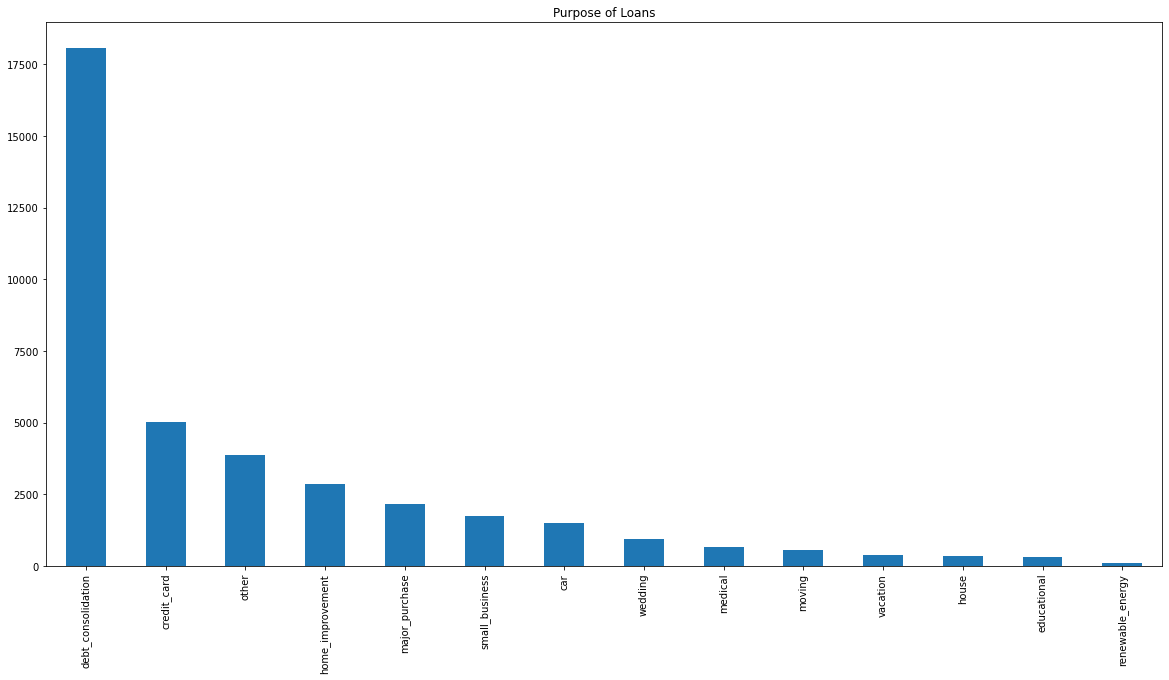

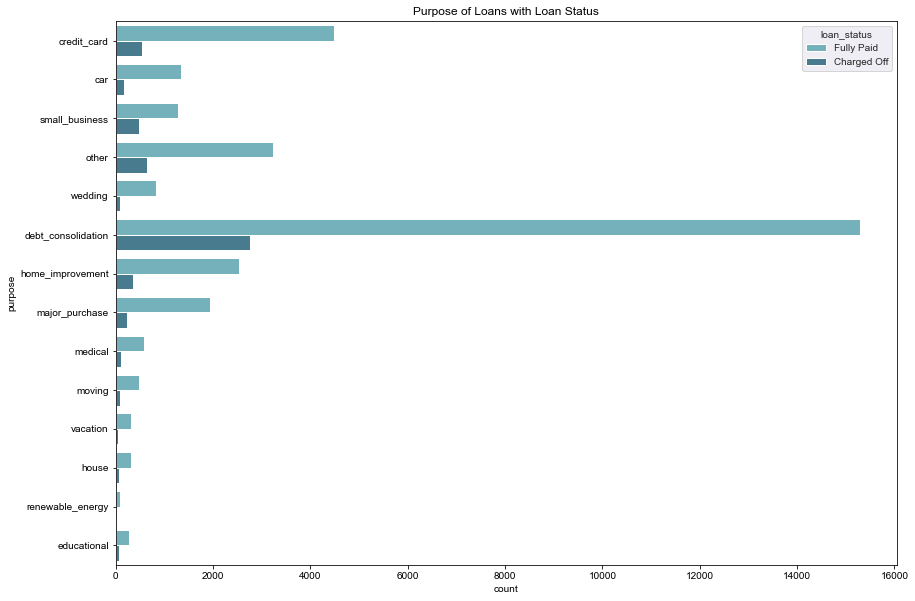

In [28]:
# Let's identify the purpose of the loans
df_ln_trn['purpose'].value_counts().plot.bar(figsize=(20,10), title= 'Purpose of Loans')
plt.show()

plt.figure(figsize=(14,10),facecolor='w')
plt.title(label = "Purpose of Loans with Loan Status")
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=df_ln_trn,hue='loan_status',palette='GnBu_d')
plt.show()

In [29]:
# To get the actual purpose numbers in percentages of total loans
#df_ln_trn['purpose'].value_counts()/len(df_ln_trn)*100
df_ln_trn['purpose'].value_counts(normalize = True)*100

debt_consolidation    46.802499
credit_card           13.031081
other                 10.018923
home_improvement       7.452627
major_purchase         5.573269
small_business         4.546751
car                    3.885735
wedding                2.400394
medical                1.765301
moving                 1.493118
vacation               0.972082
house                  0.951344
educational            0.842471
renewable_energy       0.264406
Name: purpose, dtype: float64

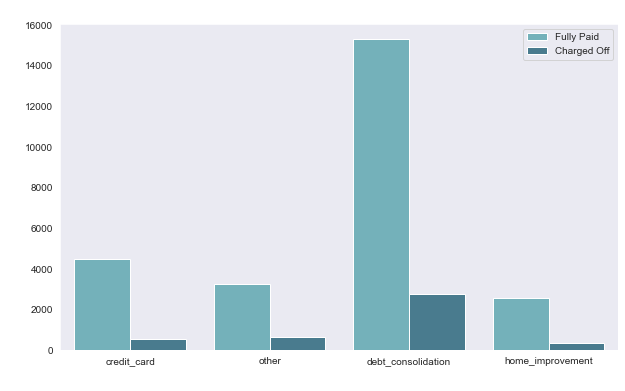

In [30]:
# Let's now look at the top 4 loan purposes (debt_consolidation,credit_card,other,home_improvement) with respect to loan_status

plt.figure(figsize=(10,6),facecolor='w')
ax = sns.countplot(x= "purpose",data= df_ln_trn[df_ln_trn.purpose.isin(['debt_consolidation','credit_card','other','home_improvement'])] ,hue= 'loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('purpose',fontsize=14,color='w')
ax.set_xlabel('purpose',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

##### Observations:
-  Maximum loans are taken for Debt Consolidation (47%) followed by Credit Card (13%), Other (10%) and Home Improvement(7%)
-  Debt Consolidation also has the highest charged off loan counts as well
-  The proportion of Loan Purpose with respect to Charged off loans will be analysed as part of bivaritate analysis later in the notebook.

#### Univariate Analysis - Loan Verification Status 

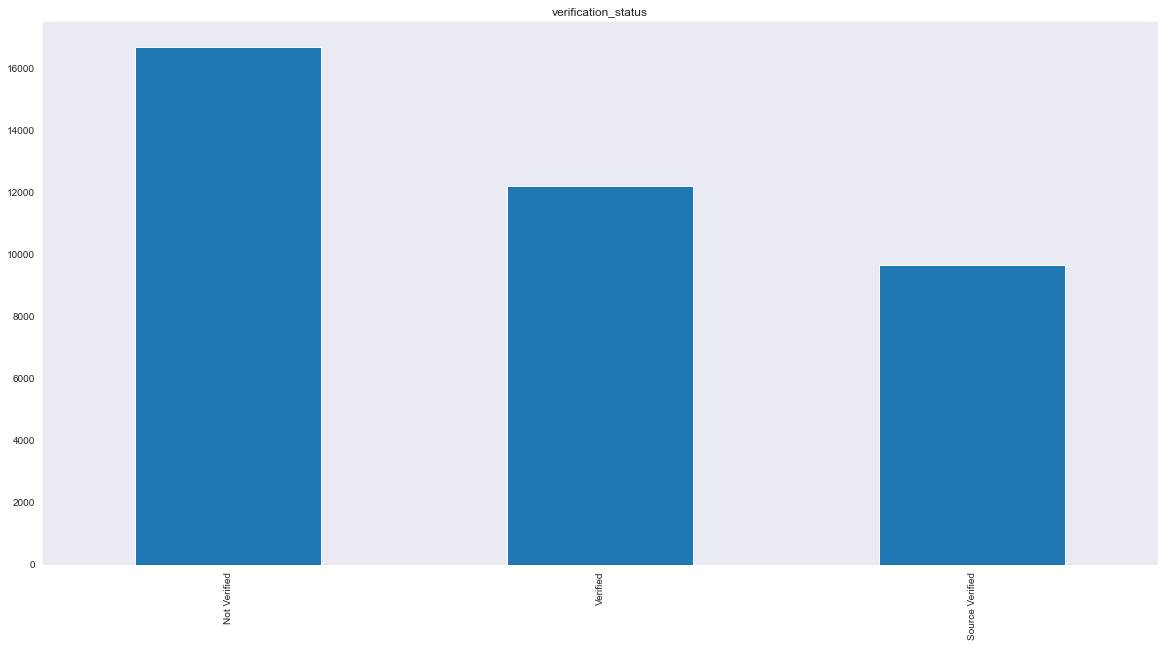

Not Verified       43.274490
Verified           31.640615
Source Verified    25.084895
Name: verification_status, dtype: float64

In [31]:
# Let's understand if the loans were verified before disbursal

df_ln_trn['verification_status'].value_counts().plot.bar(figsize=(20,10), title= 'verification_status')
plt.show()

df_ln_trn['verification_status'].value_counts()/len(df_ln_trn)*100


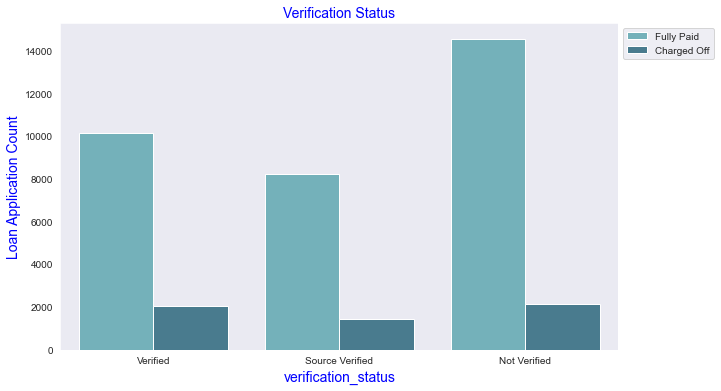

In [32]:
# Let's now look at the verification_status with respect to loan_status

plt.figure(figsize=(10,6),facecolor='w')
ax = sns.countplot(x= "verification_status",data= df_ln_trn,hue= 'loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Verification Status',fontsize=14,color='b')
ax.set_xlabel('verification_status',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')      
plt.show()

##### Observations:
-  43% are Not verified
-  32% are Verified
-  25% are Source Verified

#### Univariate Analysis - Loan distribution across states

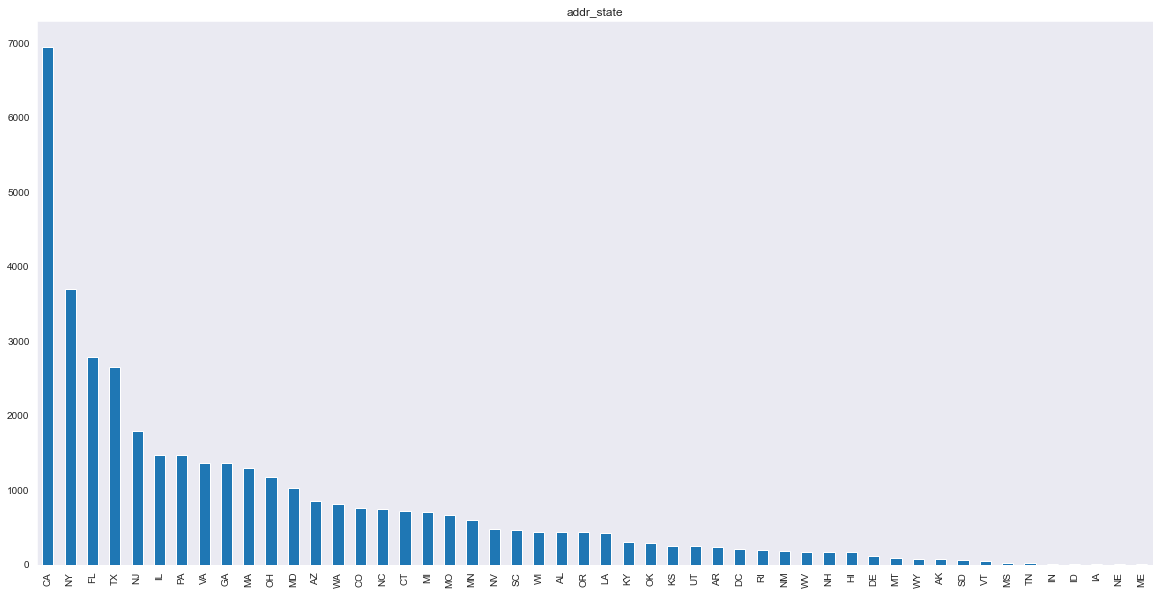

CA    18.013324
NY     9.586023
FL     7.208959
TX     6.892708
NJ     4.640071
Name: addr_state, dtype: float64

In [33]:
# Let's understand the loan distribution across states

df_ln_trn['addr_state'].value_counts().plot.bar(figsize=(20,10), title= 'addr_state')
plt.show()

#df_ln_trn['addr_state'].value_counts()/len(df_ln_trn)*100
df_ln_trn['addr_state'].value_counts(normalize = True).head()*100

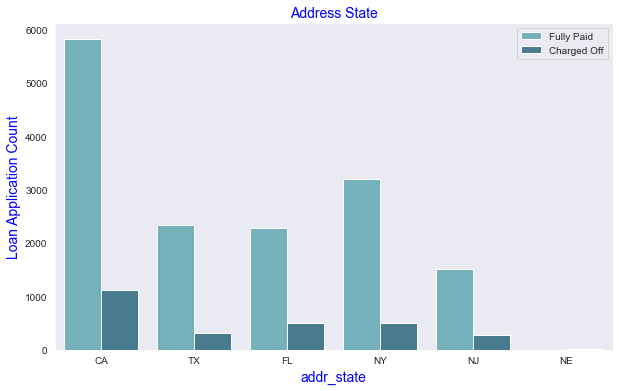

In [34]:
# Let's now look at the top 5 addr_states (CA,NY,FL,TX,NJ) with respect to loan_status

plt.figure(figsize=(10,6),facecolor='w')
ax = sns.countplot(x= "addr_state",data= df_ln_trn[df_ln_trn.addr_state.isin(['CA','NY','FL','TX','NJ','NE'])] ,hue= 'loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Address State',fontsize=14,color='b')
ax.set_xlabel('addr_state',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')      
plt.show()

##### Observations:

-  18% loans are offered to State of CA. Loan Chargeoffs also appear highest in CA
-  9% loans are offered to State of NY 
-  7% Offered to state of FL


#### Univariate Analysis - Loan distribution across home ownership

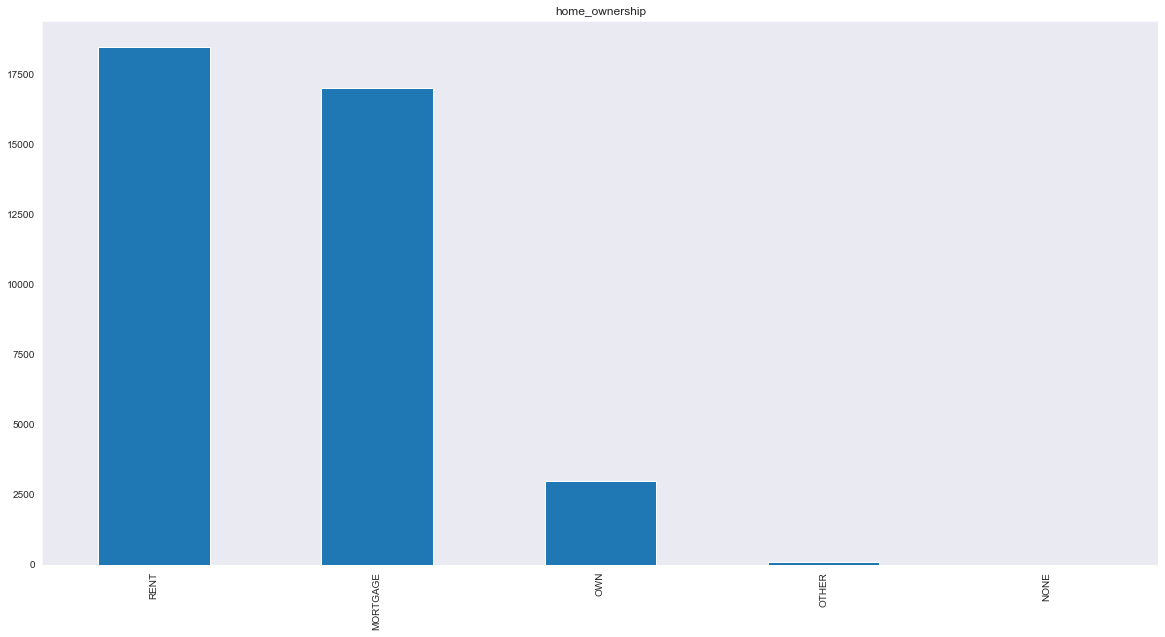

RENT        47.904192
MORTGAGE    44.122145
OWN          7.711849
OTHER        0.254037
NONE         0.007777
Name: home_ownership, dtype: float64

In [35]:
# Let's understand the loan distribution across home ownership
df_ln_trn['home_ownership'].value_counts().plot.bar(figsize=(20,10), title= 'home_ownership')
plt.show()

df_ln_trn['home_ownership'].value_counts()/len(df_ln_trn)*100

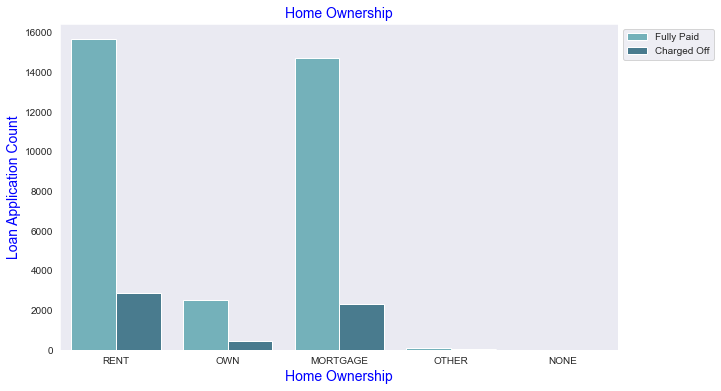

In [36]:
# Let's now look at the home_ownership with respect to loan_status

plt.figure(figsize=(10,6),facecolor='w')
ax = sns.countplot(x= "home_ownership",data= df_ln_trn,hue= 'loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='b')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')      
plt.show()

##### Observations:
- 47% are applicants who stay on rent
- 44% stay in Mortgage
- 7% are staying in their own home



### UA: Independent Variable (Ordinal)

An ordinal variable is similar to a categorical variable.  The difference between the two is that there is a clear ordering of the categories.

The Ordinal driver feature variables in our data set are -

-  term
-  year/month derived from issue_d
-  emp_length                  
-  open_acc              
-  pub_rec_bankruptcies
-  grade

Let's try to get some insight into them -

#### Univariate Analysis - Loan Term (term)

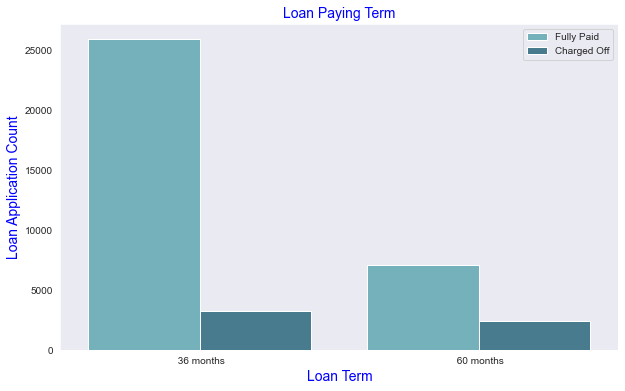

In [37]:
# Univariate Analysis - Term

plt.figure(figsize=(10,6),facecolor='w')
ax = sns.countplot(x="term",data=df_ln_trn,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='b')
ax.set_xlabel('Loan Term',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# Observations :
# Below plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting 
# charged off proportions as compared to applicants who had taken loan for 36 months.

##### Observations :
- 75% of loans are given for 36 months
- 25% loans for 60 months
- Loans with the higher term (60 months)appears to have a higher proportion of Charge offs

#### Univariate Analysis - Loan Issue Date (issue_d)

In [38]:
# Derived columns
# Lets derive some new columns using existing data as it may further be used 
# in our analysis.
# create month and year columns separately

df_ln_trn.issue_d = pd.to_datetime(df_ln_trn.issue_d, format='%b-%y')
df_ln_trn['year']=df_ln_trn['issue_d'].dt.year
df_ln_trn['month']=df_ln_trn['issue_d'].dt.month

df_ln_trn.head()

# Observations
# Two new columns month and year were derived from issue date

,id,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,pub_rec_bankruptcies,tax_liens,year,month
0,1077501,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,3,0,13648,83.7,9,0.0,0.0,0.0,2011,12
1,1077430,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,3,0,1687,9.4,4,0.0,0.0,0.0,2011,12
2,1077175,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,2,0,2956,98.5,10,0.0,0.0,0.0,2011,12
3,1076863,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,10,0,5598,21.0,37,0.0,0.0,0.0,2011,12
5,1075269,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,9,0,7963,28.3,12,0.0,0.0,0.0,2011,12


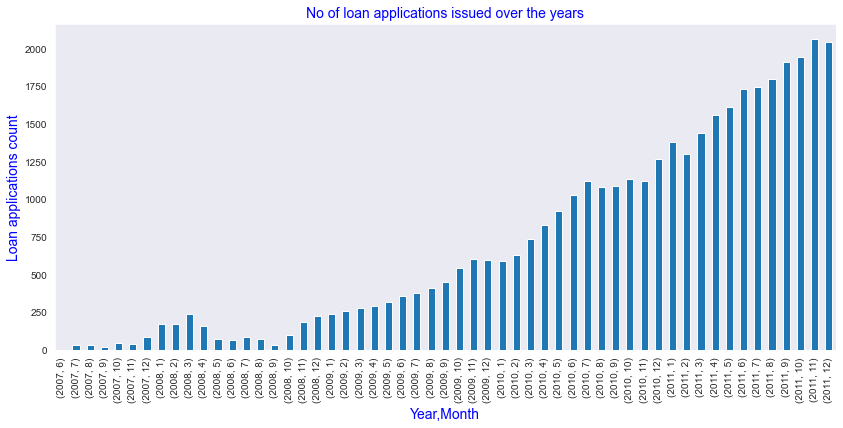

In [39]:
# Let us look into number of loans which were approved every year/month
# Lets use derived column year to check pattern of loan issuing over the years.

plt.figure(figsize=(14,6),facecolor='w')
df_ln_trn.groupby(['year','month']).id.count().plot(kind='bar')
plt.ylabel('Loan applications count',fontsize=14,color='b')
plt.xlabel('Year,Month',fontsize=14,color = 'b')      
plt.title("No of loan applications issued over the years",fontsize=14,color='b')
plt.show()


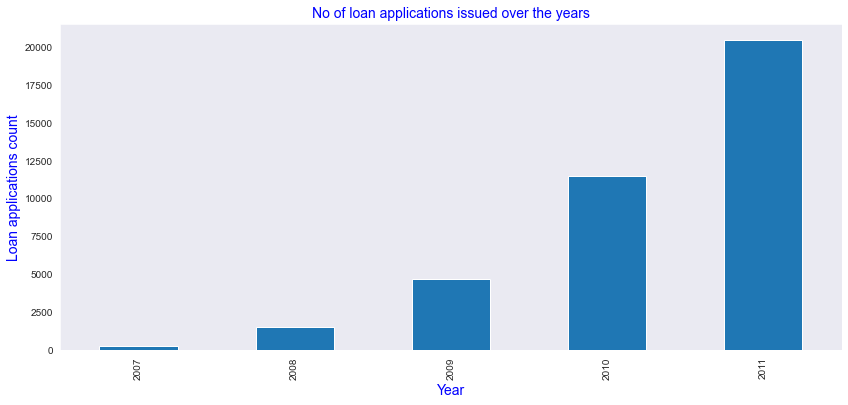

In [40]:
# Loans by Year
plt.figure(figsize=(14,6),facecolor='w')
df_ln_trn.groupby(['year']).id.count().plot(kind='bar')
plt.ylabel('Loan applications count',fontsize=14,color='b')
plt.xlabel('Year',fontsize=14,color = 'b')      
plt.title("No of loan applications issued over the years",fontsize=14,color='b')
plt.show()

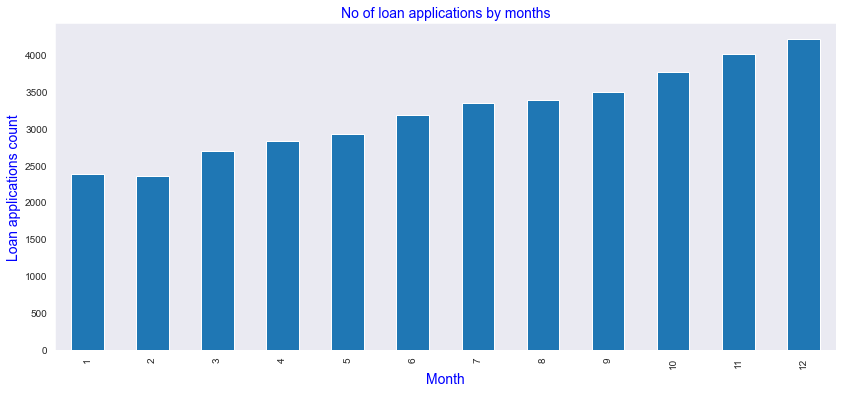

In [41]:
# Loans by Month
plt.figure(figsize=(14,6),facecolor='w')
df_ln_trn.groupby(['month']).id.count().plot(kind='bar')
plt.ylabel('Loan applications count',fontsize=14,color='b')
plt.xlabel('Month',fontsize=14,color = 'b')      
plt.title("No of loan applications by months",fontsize=14,color='b')
plt.show()

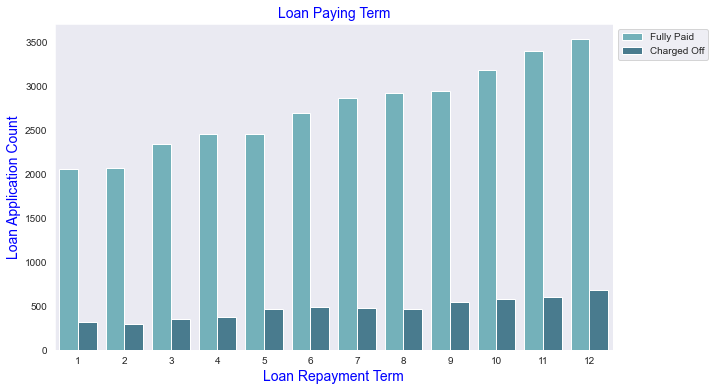

In [42]:
# Univariate Analysis - Loan Paying Term
plt.figure(figsize=(10,6),facecolor='w')
ax = sns.countplot(x="month",data=df_ln_trn,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='b')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

##### Observations:
- There is an increase in the number of loans processed every Year. Lowest during recession (2008,september)
- The number of loans issued is highest in December possibly attrubuted to the festival season and lowest in February.


#### Univariate Analysis - Employment Period (emp_length)

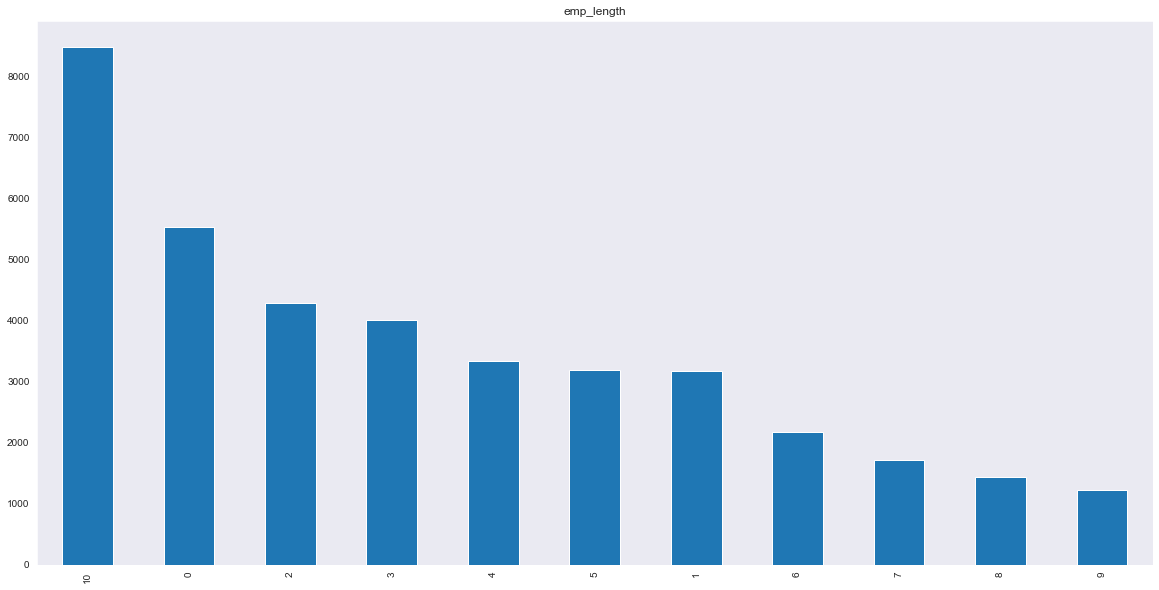

In [43]:
# Univariate Analysis - Employment Period (emp_length)
df_ln_trn['emp_length'].value_counts().plot.bar(figsize=(20,10), title= 'emp_length')
plt.show()

##### Observations: 
-  Majority of loans are santiontioned to applicants with 10+ of employment history.
-  Least number of loans are provided to applicants with least experience
-  The number of loans santioned increase with the years of experience.

#### Univariate Analysis - Public Bankruptcies Records  (pub_rec_bankruptcies)

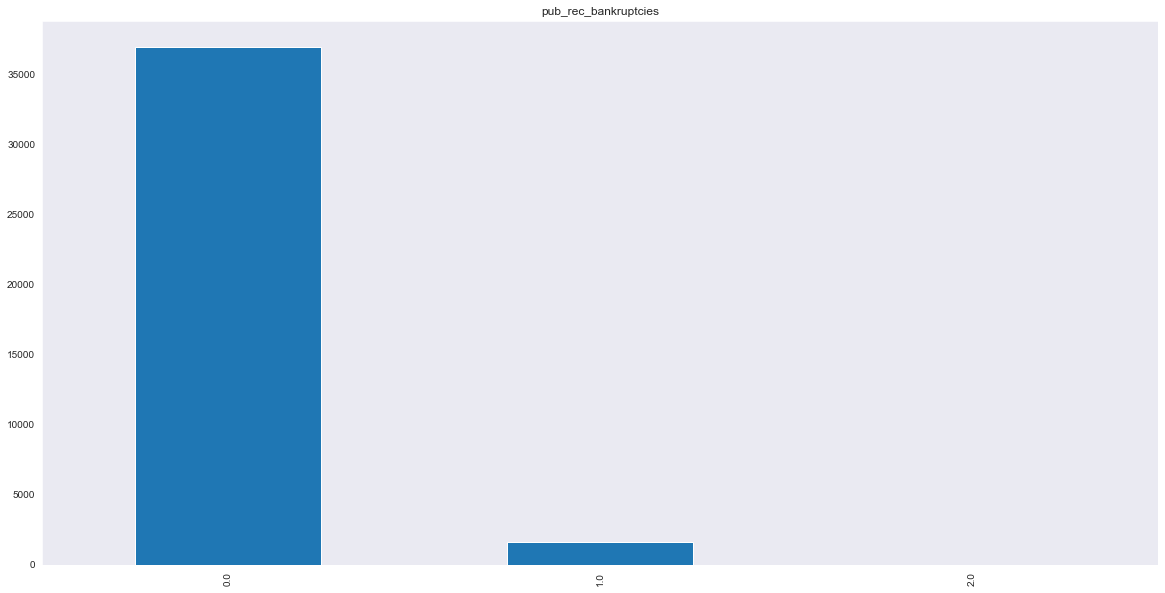

In [44]:
#Univariate Analysis - Public Bankruptcies Records (pub_rec_bankruptcies)
df_ln_trn['pub_rec_bankruptcies'].value_counts().plot.bar(figsize=(20,10), title= 'pub_rec_bankruptcies')
plt.show()

##### Observations:
-  A small percentage of Loans were provided to applicants with bankrupcy records (pub_rec_bankruptcies = 1)

#### Univariate Analysis - Open Loan Accounts (open_acc)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


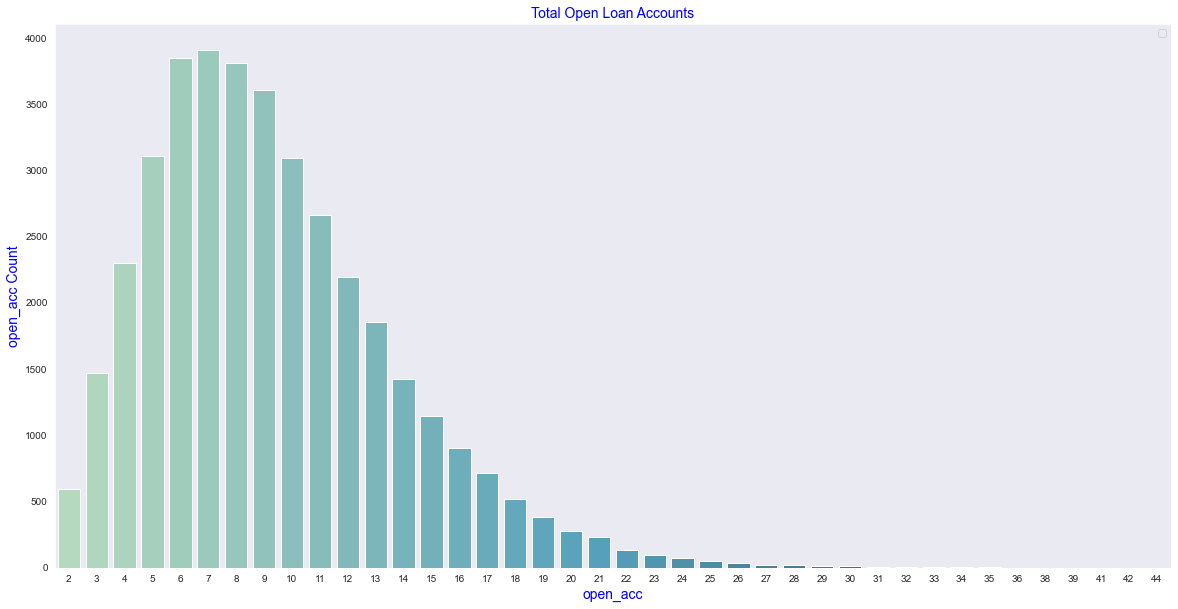

In [45]:
# Univariate Analysis - Open Loan Accounts (open_acc)
plt.figure(figsize=(20,10),facecolor='w')
ax = sns.countplot(x="open_acc",data=df_ln_trn,palette='GnBu_d')
ax.set_title('Total Open Loan Accounts',fontsize=14,color='b')
ax.set_xlabel('open_acc',fontsize=14,color = 'b')
ax.set_ylabel('open_acc Count',fontsize=14,color = 'b')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

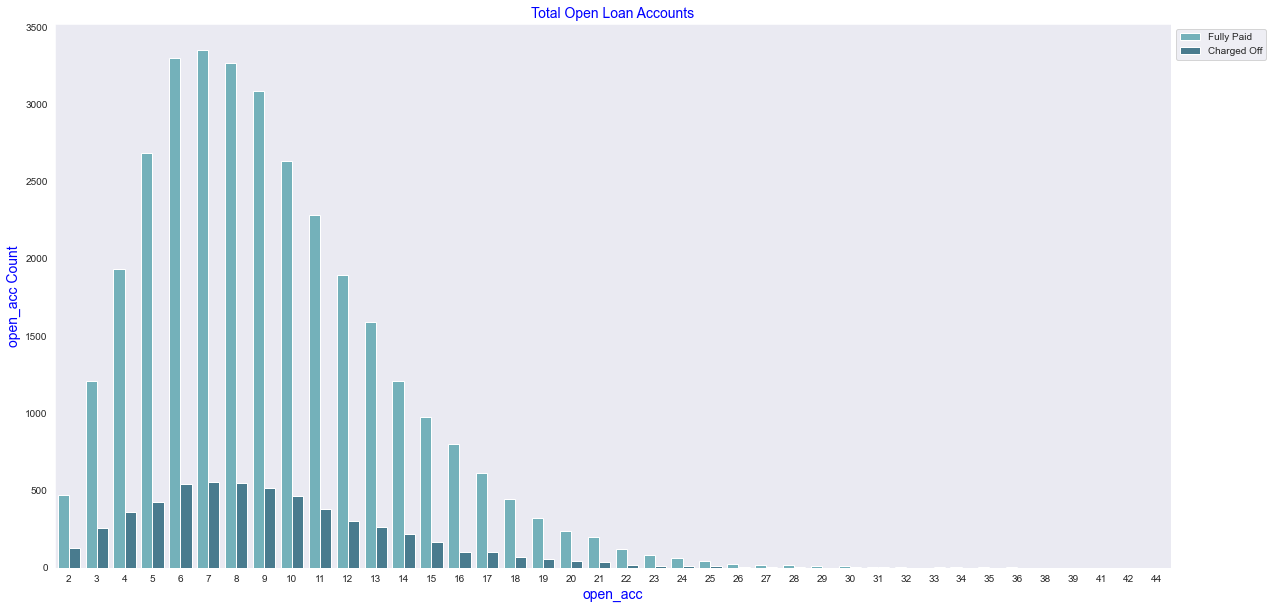

In [46]:
# Univariate Analysis - Open Loan Accounts (open_acc)
plt.figure(figsize=(20,10),facecolor='w')
ax = sns.countplot(x="open_acc",data=df_ln_trn,hue='loan_status',palette='GnBu_d')
ax.set_title('Total Open Loan Accounts',fontsize=14,color='b')
ax.set_xlabel('open_acc',fontsize=14,color = 'b')
ax.set_ylabel('open_acc Count',fontsize=14,color = 'b')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

##### Observations: 
-  Loans were provided to applicant with already high number of existing loans
-  There is an increasing trend of loans sanctioned upto 7 open accounts.
-  After 7 open accounts here is a decreasing trend in the loans sactioned with respect to the number of open accounts.


#### Univariate Analysis - Grade (~ Credit Risk indicator)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


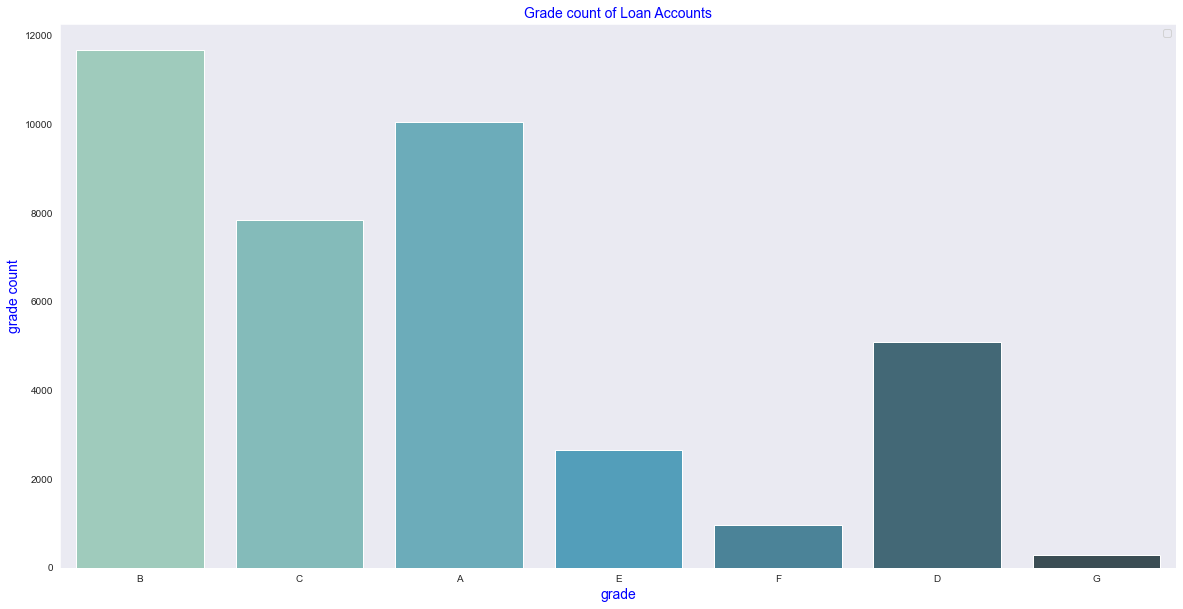

In [47]:
# Univariate Analysis - Open Loan Accounts (open_acc)
plt.figure(figsize=(20,10),facecolor='w')
ax = sns.countplot(x="grade",data=df_ln_trn,palette='GnBu_d')
ax.set_title('Grade count of Loan Accounts',fontsize=14,color='b')
ax.set_xlabel('grade',fontsize=14,color = 'b')
ax.set_ylabel('grade count',fontsize=14,color = 'b')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

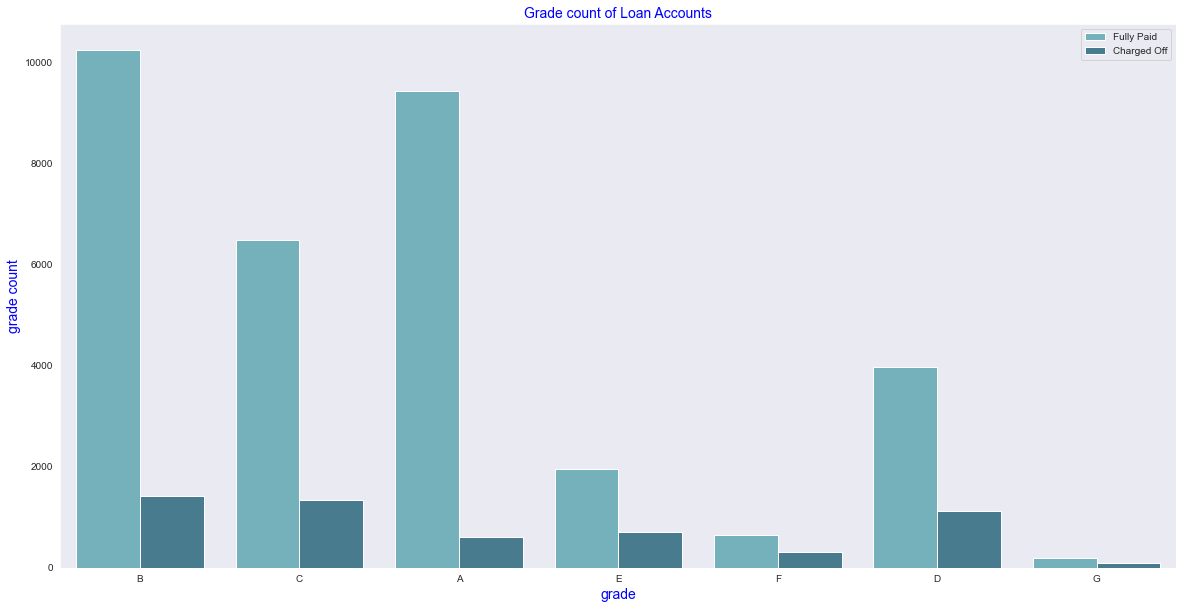

In [48]:
# Univariate Analysis - Open Loan Accounts (open_acc)
plt.figure(figsize=(20,10),facecolor='w')
ax = sns.countplot(x="grade",data=df_ln_trn,hue='loan_status',palette='GnBu_d')
ax.set_title('Grade count of Loan Accounts',fontsize=14,color='b')
ax.set_xlabel('grade',fontsize=14,color = 'b')
ax.set_ylabel('grade count',fontsize=14,color = 'b')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

#### Observations:
- Grade B applicant recieved the highest number of Loans followed by A 

### UA: Independent Variable (Numerical)

After analysing the categorical and ordinal variables we visualize the numerical variables. 

-  annual_inc
-  funded_amnt_inv
-  int rate
-  dti
-  inq_last_6mths (Numerical)* 
-  revol_bal (Numerical)*                       
-  revol_util (Numerical)*



#### Univariate Analysis - Annual Income (annual_inc)

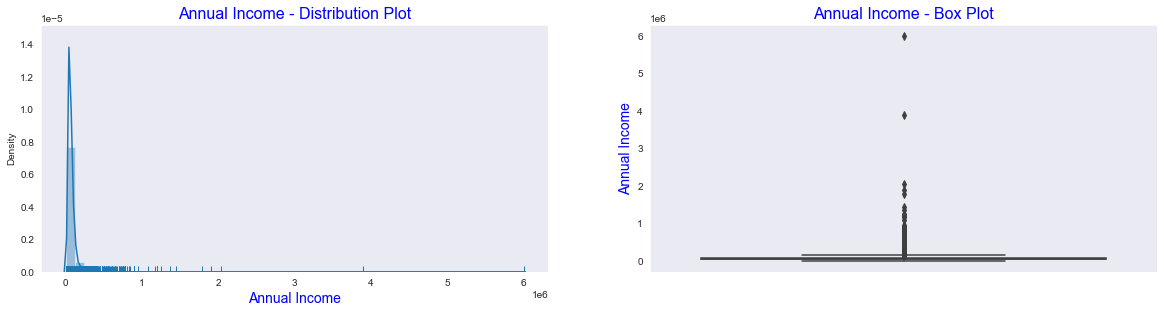

In [49]:
# Annual Income -

#sns.distplot(df_ln_trn['annual_inc'])
#plt.show()

#df_ln_trn['annual_inc'].plot.box(figsize=(16,5))
#sns.boxplot(df_ln_trn.annual_inc)
#plt.show()

plt.figure(figsize=(20,10),facecolor='w')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(df_ln_trn['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='b')
ax.set_xlabel('Annual Income',fontsize=14,color='b')
# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax = sns.boxplot(y=df_ln_trn['annual_inc'])
ax.set_title('Annual Income - Box Plot',fontsize=16,color='b')
ax.set_ylabel('Annual Income',fontsize=14,color='b')
plt.show()


The distribution plot is left skewed (most of the applicants are towards left). A logrithmic scale would have to be applied to make it normal distributed. This is not part of this scope and can be taken up at the time of Machine learning modeling scope.

The box plot reveals that there are lot of outliers.

##### Outlier Treatment

In [50]:
print('Before Removal of Outliers :\n')
print(df_ln_trn['annual_inc'].describe())
df_ln_trn_out = df_ln_trn 


Before Removal of Outliers :

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


In [51]:
# In order to better visualize the plot it would be better to Remove Outliers 
# quantile .99 from Annual Income

#df_ln_trn = df_ln_trn[df_ln_trn["annual_inc"] < df_ln_trn["annual_inc"].quantile(0.99)]
df_ln_trn_out = df_ln_trn[df_ln_trn["annual_inc"] < df_ln_trn["annual_inc"].quantile(0.99)]

In [52]:
print('After Removal of Outliers :\n')
#print(df_ln_trn['annual_inc'].describe())
print(df_ln_trn_out['annual_inc'].describe())

After Removal of Outliers :

count     38191.000000
mean      65313.610090
std       35150.773045
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80232.000000
max      234000.000000
Name: annual_inc, dtype: float64


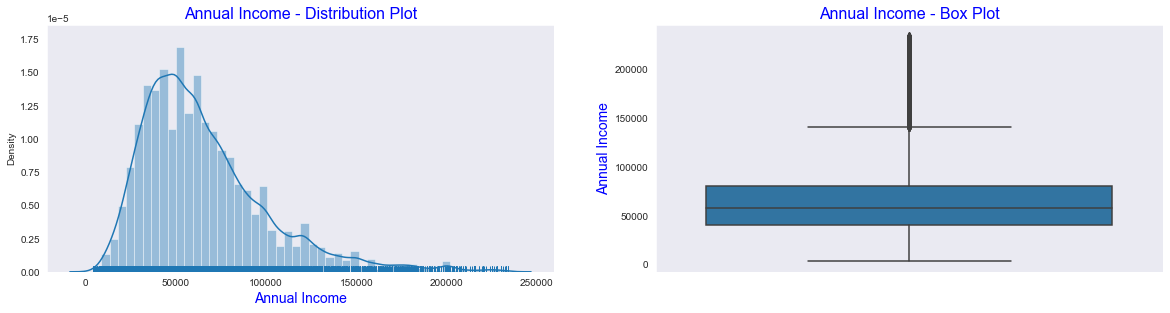

In [53]:
# View after Annual Income distribution and box plot after Outlier treatment.
# However, we will continue our further analysis without 
# removing the outliers from the main data set
#sns.boxplot(df_ln_trn_out.annual_inc)

plt.figure(figsize=(20,10),facecolor='w')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(df_ln_trn_out['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='b')
ax.set_xlabel('Annual Income',fontsize=14,color='b')
# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax = sns.boxplot(y=df_ln_trn_out['annual_inc'])
ax.set_title('Annual Income - Box Plot',fontsize=16,color='b')
ax.set_ylabel('Annual Income',fontsize=14,color='b')
plt.show()

Text(0.5, 0.98, '')

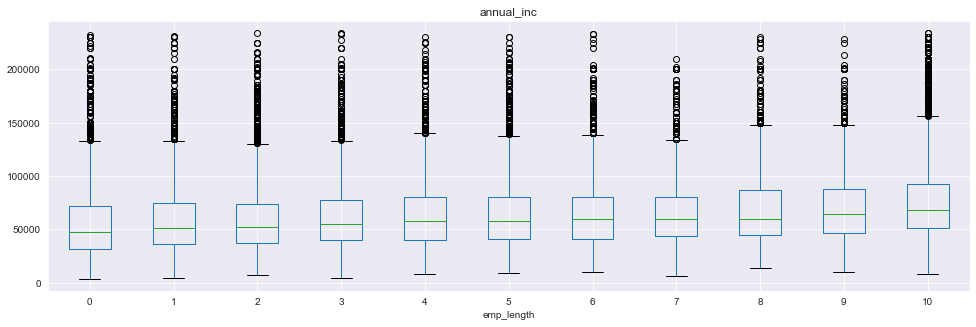

In [54]:
#Plot annual income by employee length
df_ln_trn_out.boxplot(column= 'annual_inc', by = 'emp_length',figsize =(16,5)) 
plt.suptitle("")

##### Observation:
- We observe that there are large number of annual_inc outliers in every emp_length category. However, the 10+ category appears to have the largest number of outliers.

- Most of the borrower's income lies in the range of 40000 - 80000

#### Univariate Analysis - Final Funded Amount (funded_amnt_inv)

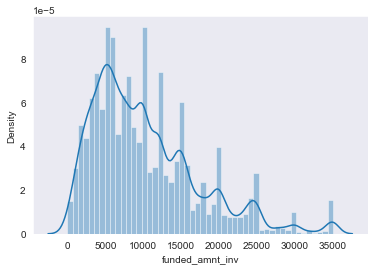

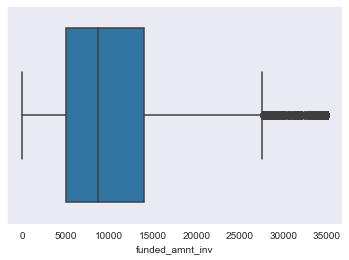

In [55]:
# Funded Amount invested - Univariate on funded amount
df_ln_trn.notna()
sns.distplot(df_ln_trn['funded_amnt_inv'])
plt.show()
sns.boxplot(df_ln_trn.funded_amnt_inv)
plt.show()

The distribution plot is left skewed (most of the applicants are towards left i.e lower loan amounts). 

The box plot reveals that there are lot of outliers.HOwever we will not treat them for this case study

Text(0.5, 0.98, '')

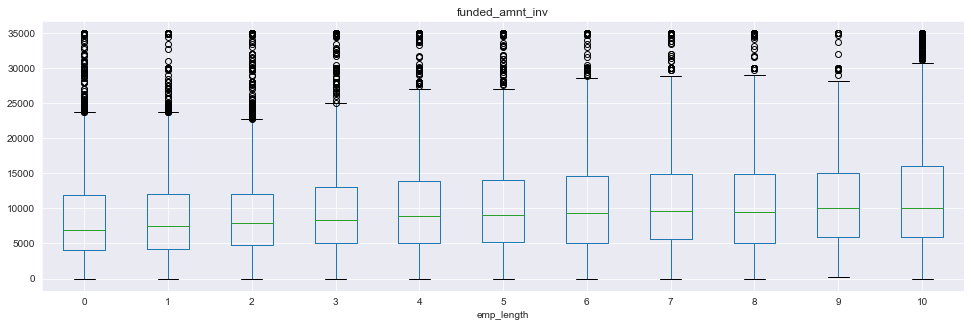

In [56]:
# plot funded amount invested by Employee lenght
df_ln_trn.boxplot(column= 'funded_amnt_inv', by = 'emp_length',figsize =(16,5)) 
plt.suptitle("")

##### Observation:  

- We observe that there are large number of outliers in the 2 and <1 year category. They seem to be granted lower loan amounts in general. However, the 10+ category appears to have the lowest number of outliers with respect to loan_amnt.

- Most of the final funded amount is in the range of 5000 - 15000 USD


#### Univariate Analysis - Loan Interest Rate (int_rate)

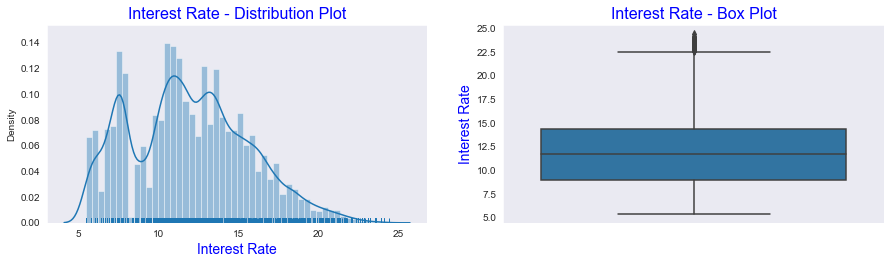

In [57]:
# Univariate Analysis on interest rate


plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(df_ln_trn['int_rate'],rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='b')
ax.set_xlabel('Interest Rate',fontsize=14,color='b')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=df_ln_trn['int_rate'])
ax.set_title('Interest Rate - Box Plot',fontsize=16,color='b')
ax.set_ylabel('Interest Rate',fontsize=14,color='b')
plt.show()


##### Observation:

- Majority of the loans have been offered in the interest range of 10% to 15%
    

#### Univariate Analysis - Debt to Income Ratio (dti)

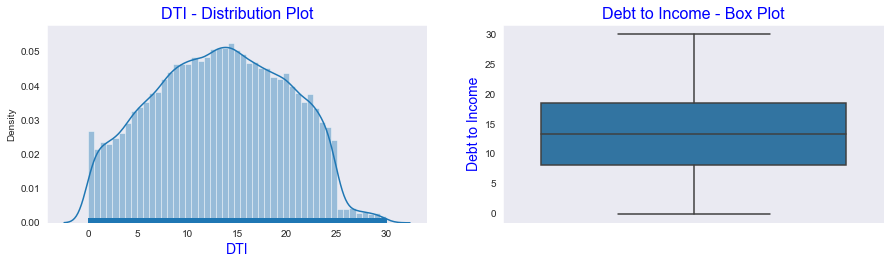

In [58]:
## Univariate Analysis on DTI

plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(df_ln_trn['dti'],rug = True)
ax.set_title('DTI - Distribution Plot',fontsize=16,color='b')
ax.set_xlabel('DTI',fontsize=14,color='b')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=df_ln_trn['dti'])
ax.set_title('Debt to Income - Box Plot',fontsize=16,color='b')
ax.set_ylabel('Debt to Income',fontsize=14,color='b')
plt.show()

##### Observations:

- Majority of the loans have been offered to applicant with a DTI ration between of 9 to to 19.

##### Creating Derived columns for Bivariate Analysis

In [59]:
# Derived columns for Bivariate numerical variables

# categorise funded amount invested into buckets which will help in analysis further 
# in bivariate analysis.
df_ln_trn['funded_amnt_inv_cats'] = pd.cut(df_ln_trn['funded_amnt_inv'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
df_ln_trn['annual_inc_cats'] = pd.cut(df_ln_trn['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
df_ln_trn['int_rate_cats'] = pd.cut(df_ln_trn['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti into buckets for bivariate analysis.
df_ln_trn['dti_cats'] = pd.cut(df_ln_trn['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

# categorise open_acc into buckets for bivariate analysis.
df_ln_trn['open_cats'] = pd.cut(df_ln_trn['open_acc'], [0, 7, 14, 21, 28, 35,50], labels=['0-7', '07-14', '14-21', '21-28', '28-35','35+'])


### Bivariate Analysis 

Some of the hypothesis we derived so far using Univaraite analysis needs to be further explored using Bivariate Analysis

- Majority of loans are santiontioned to applicants with 10+ of employment history. 
- Applicants with high incomes have more loan approvals and possibly higher loan replayment (Fully Paid)
-  Applicants who have repaid their previous debts should have higher chances of loan approval and loan repayment.
-  Loan approval should also depend on the loan amount. If the loan amount is less, the chances of loan repayment is higher.
-  Lesser the amount to be paid monthly to repay the loan, the higher the chances of loan repayment.(term and installment)
-  Loans were provided to applicant with already high number of existing loans could have higher defaults (Charge-off).
-  A small percentage of Loans were provided to applicants with bankrupcy records (pub_rec_bankruptcies) and could have higher defaults (Charge-off).
-  Loans with higher dti (debt to Income ratio) could could have higher defaults (Charge-off).



### BV: Categorical Independent Variable vs Target Variable

First of all, we will find the relation between the target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.

#### Bivariate - Proportion of Homeownership defaults

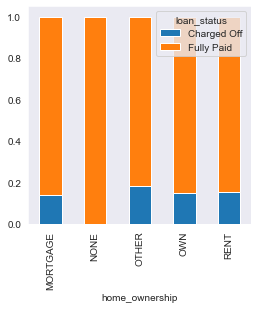

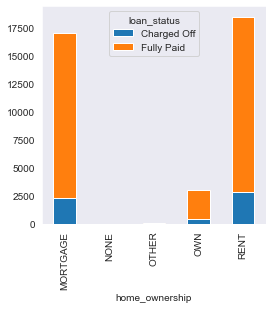

In [60]:
# Proportion of Homeownership defaults -

df_homeownership = pd.crosstab(df_ln_trn['home_ownership'],df_ln_trn['loan_status'])
df_homeownership.div(df_homeownership.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

df_homeownership.plot(kind = 'bar', stacked = True,figsize = (4,4))
plt.show()


In [61]:
# home_ownership vs loan status charged off proportion
home_vs_lnstate = df_ln_trn.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_vs_lnstate ['Total'] = home_vs_lnstate['Charged Off']  + home_vs_lnstate['Fully Paid'] 
home_vs_lnstate ['Chargedoff_Proportion'] = home_vs_lnstate['Charged Off'] / home_vs_lnstate['Total']
home_vs_lnstate.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,OTHER,18.0,80.0,98.0,0.183673
4,RENT,2839.0,15641.0,18480.0,0.153626
3,OWN,443.0,2532.0,2975.0,0.148908
0,MORTGAGE,2327.0,14694.0,17021.0,0.136713
1,NONE,0.0,3.0,3.0,0.000000


##### Observation:  
- Rent and others have the highest Charged Off proportion
- Mortgage seems to be lower than the average default rate


#### Bivariate - Proportion of verification_status defaults

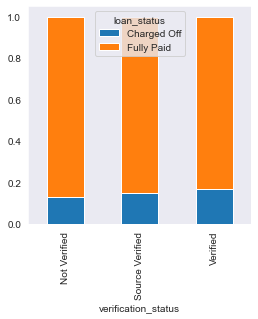

In [62]:
# Proportion of verification_status defaults -

df_verificationstatus = pd.crosstab(df_ln_trn['verification_status'],df_ln_trn['loan_status'])

df_verificationstatus.div(df_verificationstatus.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
#df_verificationstatus.plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

In [63]:
# Verification_state vs loan status charged off proportion
ver_vs_lnstate = df_ln_trn.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
ver_vs_lnstate ['Total'] = ver_vs_lnstate['Charged Off']  + ver_vs_lnstate['Fully Paid'] 
ver_vs_lnstate ['Chargedoff_Proportion'] = ver_vs_lnstate['Charged Off'] / ver_vs_lnstate['Total']
ver_vs_lnstate.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,verification_status,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,Verified,2051,10155,12206,0.168032
1,Source Verified,1434,8243,9677,0.148186
0,Not Verified,2142,14552,16694,0.128310


##### Observation:
- The proportion of Verification status seems almost similar across all categories.i.e. A verified loan application almost carries the same risk as a non verified or a source verified loan 


#### Bivariate - Proportion of Loan purpose defaults

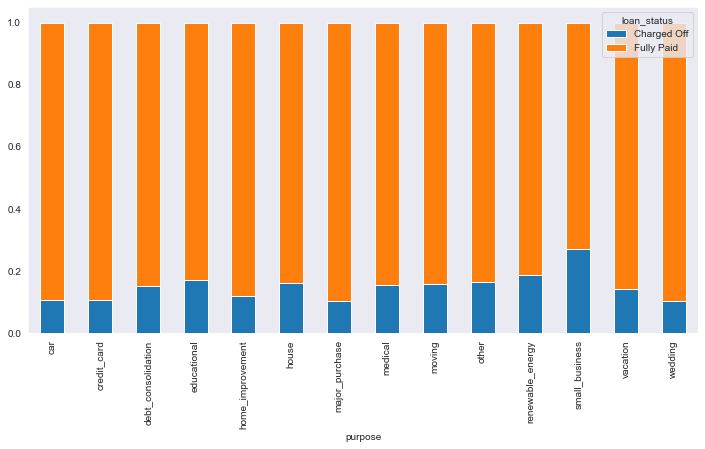

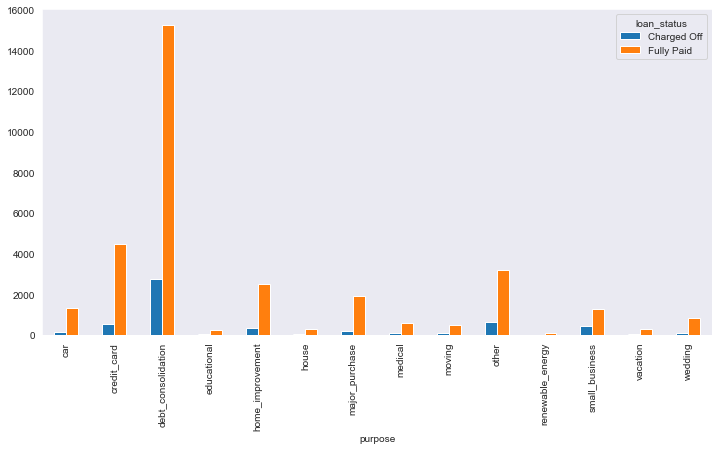

In [64]:
# Proportion of Loan purpose defaults -

df_purpose = pd.crosstab(df_ln_trn['purpose'],df_ln_trn['loan_status'])

df_purpose.div(df_purpose.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(12,6))
df_purpose.plot(kind='bar',stacked=False,figsize=(12,6))
plt.show()


In [65]:
# Purpose vs loan status charged off proportion
purp_vs_lnstate = df_ln_trn.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purp_vs_lnstate ['Total'] = purp_vs_lnstate['Charged Off']  + purp_vs_lnstate['Fully Paid'] 
purp_vs_lnstate ['Chargedoff_Proportion'] = purp_vs_lnstate['Charged Off'] / purp_vs_lnstate['Total']
purp_vs_lnstate.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,475,1279,1754,0.270810
10,renewable_energy,19,83,102,0.186275
3,educational,56,269,325,0.172308
9,other,633,3232,3865,0.163777
5,house,59,308,367,0.160763
8,moving,92,484,576,0.159722
7,medical,106,575,681,0.155653
2,debt_consolidation,2767,15288,18055,0.153254
12,vacation,53,322,375,0.141333
4,home_improvement,347,2528,2875,0.120696


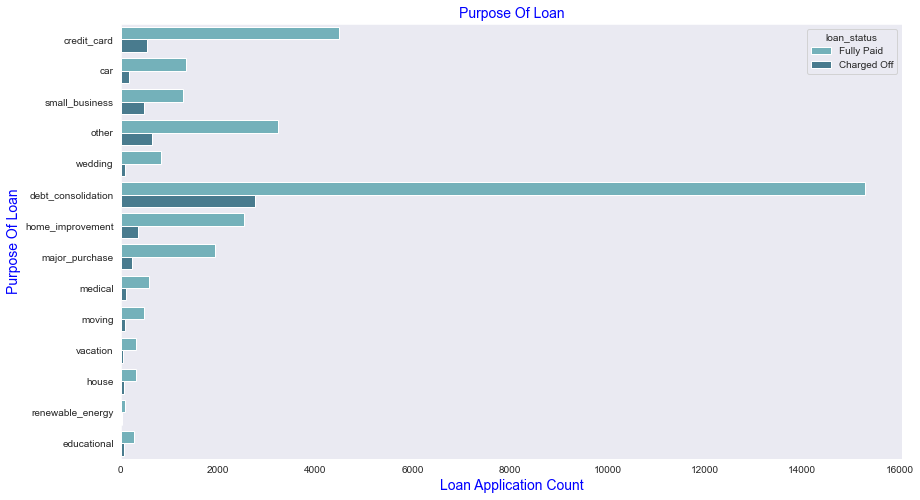

In [66]:
# Plot # Purpose vs loan status charged off proportion
plt.figure(figsize=(14,8),facecolor='w')
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=df_ln_trn,hue='loan_status',palette='GnBu_d')
ax.set_title('Purpose Of Loan',fontsize=14,color='b')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'b')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'b')      
plt.show()

##### Observation:
- Charged Off percentage was higher when loans were offered for small business

- Charged Off percentage is lowest when offered for weddings or major purchases


#### Bivariate - Proportion of address state defaults

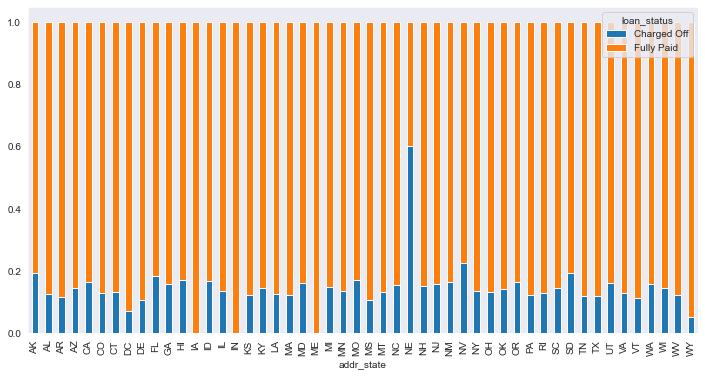

In [67]:
# Proportion of addr_state defaults -

df_addrstate = pd.crosstab(df_ln_trn['addr_state'],df_ln_trn['loan_status'])

df_addrstate.div(df_addrstate.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(12,6))
#df_addrstate.plot(kind='bar',stacked=False,figsize=(12,6))
plt.show()

In [68]:
# state vs loan status charged off proportion
state_vs_lnstate = df_ln_trn.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_lnstate ['Total'] = state_vs_lnstate['Charged Off']  + state_vs_lnstate['Fully Paid'] 
state_vs_lnstate ['Chargedoff_Proportion'] = state_vs_lnstate['Charged Off'] / state_vs_lnstate['Total']
state_vs_lnstate.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,addr_state,Charged Off,Fully Paid,Total,Chargedoff_Proportion
28,NE,3.0,2.0,5.0,0.600000
32,NV,108.0,371.0,479.0,0.225470
40,SD,12.0,50.0,62.0,0.193548
0,AK,15.0,63.0,78.0,0.192308
9,FL,504.0,2277.0,2781.0,0.181230
24,MO,114.0,556.0,670.0,0.170149
11,HI,28.0,138.0,166.0,0.168675
13,ID,1.0,5.0,6.0,0.166667
31,NM,30.0,153.0,183.0,0.163934
36,OR,71.0,364.0,435.0,0.163218


##### Observation:
-  IA & ME has the highest number of sucessfull loan repayments and practically no loan defualts. NE has the highest number of defaults.

- NE shows higher proportion of charged off loans. However, the number of applicants is only 5

- Any state with less than 0.14 as charged off proportion is a less risky candidate for loan disbursal (TX=0.12 and good no of applications)

Let's now look at the relationship between remaining Ordinal independent variables and Loan_Status.

### BV: Ordinal Independent Variable vs Target Variable

#### Bivariate - Proportion of Employee Lenght defaults

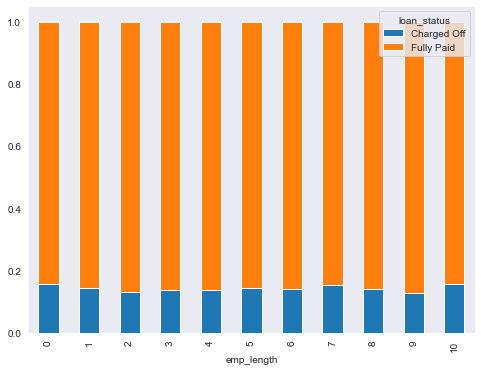

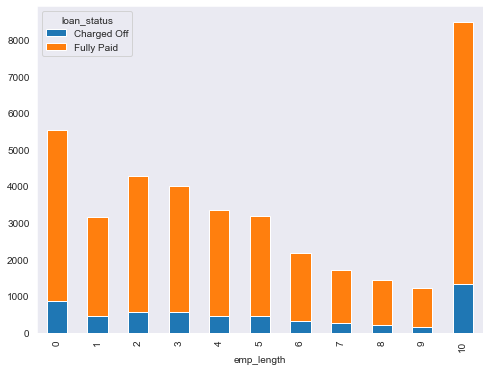

In [69]:
# plot proportion of employee length with loan status
df_emplength = pd.crosstab(df_ln_trn['emp_length'],df_ln_trn['loan_status'])

df_emplength.div(df_emplength.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(8,6))
df_emplength.plot(kind = 'bar', stacked = True,figsize = (8,6))
plt.show()

In [70]:
# employee length vs loan status charged off proportion
empln_vs_lnstate = df_ln_trn.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
empln_vs_lnstate ['Total'] = empln_vs_lnstate['Charged Off']  + empln_vs_lnstate['Fully Paid'] 
empln_vs_lnstate ['Chargedoff_Proportion'] = empln_vs_lnstate['Charged Off'] / empln_vs_lnstate['Total']
empln_vs_lnstate.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,emp_length,Charged Off,Fully Paid,Total,Chargedoff_Proportion
10,10,1331,7157,8488,0.156810
0,0,867,4674,5541,0.156470
7,7,263,1448,1711,0.153711
1,1,456,2713,3169,0.143894
5,5,458,2736,3194,0.143394
6,6,307,1861,2168,0.141605
8,8,203,1232,1435,0.141463
3,3,555,3457,4012,0.138335
4,4,462,2880,3342,0.138241
2,2,567,3724,4291,0.132137


##### Observation:   
It can be inferred that the maximum amount of loan defaults are in 10+ employee length category. However the proportion of defaults with respect to the total loans provided in this category are almost similar in comparison to other categories like O or 1 year employee length.

Employment length seems to have no impact on Charge Off proportion

Now let us visualize the remaining Ordinal variables vs target variable.

#### Bivariate - Proportion of Public Record of Bankruptcies defaults

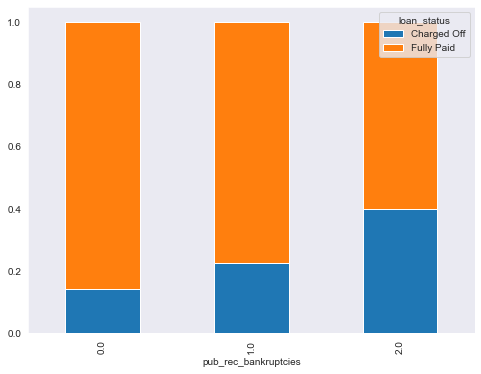

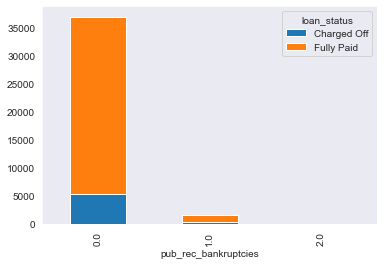

In [71]:
# plot proportion of public bankruptcies record with loan status
df_pubrecbankruptcies = pd.crosstab(df_ln_trn['pub_rec_bankruptcies'],df_ln_trn['loan_status'])

df_pubrecbankruptcies.div(df_pubrecbankruptcies.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(8,6))
df_pubrecbankruptcies.plot(kind = 'bar', stacked = True,figsize = (6,4))
plt.show()

In [72]:
# employee pub_rec_bankruptcies vs loan status charged off proportion
bnk_vs_lnstate = df_ln_trn.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bnk_vs_lnstate ['Total'] = bnk_vs_lnstate['Charged Off']  + bnk_vs_lnstate['Fully Paid'] 
bnk_vs_lnstate ['Chargedoff_Proportion'] = bnk_vs_lnstate['Charged Off'] / bnk_vs_lnstate['Total']
bnk_vs_lnstate.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,2.0,2,3,5,0.400000
1,1.0,366,1271,1637,0.223580
0,0.0,5259,31676,36935,0.142385


##### Observations
- Applicants with higher publicly recorded bankruptcy records have higher likelihood of default

- Charged off percentage is highest when publicly recorded bankruptcy count is 2 and lowest when 0

#### Bivariate - Proportion of Term defaults

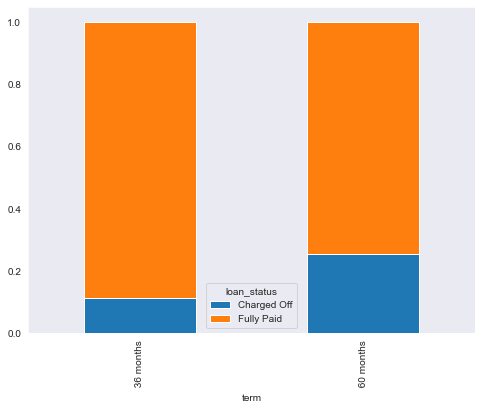

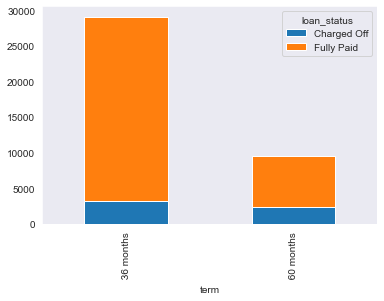

In [73]:
# plot proportion of term with loan status
df_term = pd.crosstab(df_ln_trn['term'],df_ln_trn['loan_status'])

df_term.div(df_term.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(8,6))
df_term.plot(kind = 'bar', stacked = True,figsize = (6,4))
plt.show()


In [74]:
# employee term vs loan status charged off proportion
term_vs_lnstate = df_ln_trn.groupby(['term', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
term_vs_lnstate['Total'] = term_vs_lnstate['Charged Off']  + term_vs_lnstate['Fully Paid'] 
term_vs_lnstate['Chargedoff_Proportion'] = term_vs_lnstate['Charged Off'] / term_vs_lnstate['Total']
term_vs_lnstate.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,term,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,60 months,2400,7081,9481,0.253138
0,36 months,3227,25869,29096,0.110909


##### Observations:
- Loans given for a period of 60 months has higher charge off proportion when compared to loans given for 36 months


#### Bivariate - Proportion of Grade (implying Credit Risk) defaults

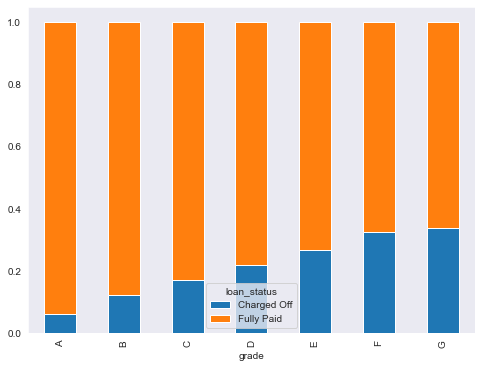

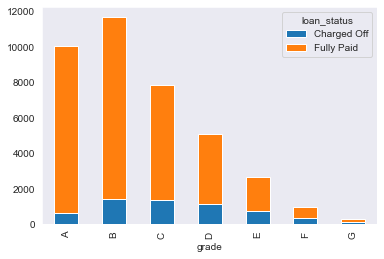

In [75]:
# plot proportion of grade with loan status
df_grade = pd.crosstab(df_ln_trn['grade'],df_ln_trn['loan_status'])

df_grade.div(df_grade.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(8,6))
df_grade.plot(kind = 'bar', stacked = True,figsize = (6,4))
plt.show()

In [76]:
# grade vs loan status charged off proportion
grd_vs_lnstate = df_ln_trn.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grd_vs_lnstate ['Total'] = grd_vs_lnstate['Charged Off']  + grd_vs_lnstate['Fully Paid'] 
grd_vs_lnstate ['Chargedoff_Proportion'] = grd_vs_lnstate['Charged Off'] / grd_vs_lnstate['Total']
grd_vs_lnstate.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
6,G,101,198,299,0.337793
5,F,319,657,976,0.326844
4,E,715,1948,2663,0.268494
3,D,1118,3967,5085,0.219862
2,C,1347,6487,7834,0.171943
1,B,1425,10250,11675,0.122056
0,A,602,9443,10045,0.059930


##### Observations:
- Grade G followed by Grade E has highest charged off percentage 

- Grade A has the lowest charged off percentage

- Applicants with higher credit risk are most likely to default(Charged Off)

#### Bivariate - Proportion of Derogatory (implying Credit Risk) defaults

In [77]:
# Bivariate Analysis on Derogatory Public Record against Chargedoff_Proportion

derpubrec_vs_loan = df_ln_trn.groupby(['pub_rec', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
derpubrec_vs_loan['Total']=derpubrec_vs_loan['Charged Off']+derpubrec_vs_loan['Fully Paid'] 
derpubrec_vs_loan['Chargedoff_Proportion'] = derpubrec_vs_loan['Charged Off'] / derpubrec_vs_loan['Total']
derpubrec_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,pub_rec,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,1,457.0,1556.0,2013.0,0.227024
2,2,10.0,38.0,48.0,0.208333
0,0,5160.0,31347.0,36507.0,0.141343
3,3,0.0,7.0,7.0,0.000000
4,4,0.0,2.0,2.0,0.000000


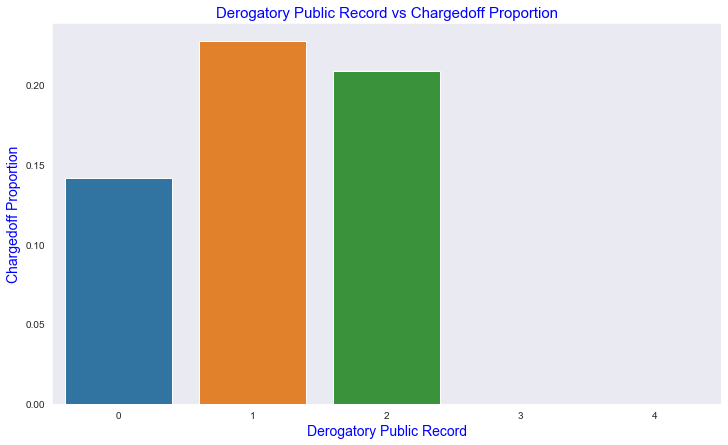

In [78]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='w')
ax1.set_title('Derogatory Public Record vs Chargedoff Proportion',fontsize=15,color='b')
ax1=sns.barplot(x='pub_rec', y='Chargedoff_Proportion', data=derpubrec_vs_loan)
ax1.set_xlabel('Derogatory Public Record',fontsize=14,color='b')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'b')
plt.show()


##### Observations:

- A derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts your ability to qualify for credit or other services. 
- Public records and collections are derogatory items because they reflect financial obligations that were not paid as agreed.
- Those who already have pub_rec value 1 or 2 have charged off chances higher than who have no Derogatory Public Record.
- pub_rec count 3-4 has less numbers so cannot reach on any conclusions.

Let's now look at the relationship between Numerical independent variables and Loan_Status in the next section using Bivariate Analysis.

-  annual_inc (Numerical)
-  dti (Numerical-Ordered)
-  inq_last_6mths (Numerical)
-  int_rate
-  total_acc
-  revol_bal (Numerical)
-  revol_util (Numerical)

-  installment 

##### Derived columns for Bivariate numerical variables

In [79]:
# Derived columns for Bivariate numerical variables

# categorise funded amount invested into buckets which will help in analysis further 
# in bivariate analysis.
df_ln_trn['funded_amnt_inv_cats'] = pd.cut(df_ln_trn['funded_amnt_inv'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
df_ln_trn['annual_inc_cats'] = pd.cut(df_ln_trn['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
df_ln_trn['int_rate_cats'] = pd.cut(df_ln_trn['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti into buckets for bivariate analysis.
df_ln_trn['dti_cats'] = pd.cut(df_ln_trn['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

### BV: Numerical Independent Variable vs Target Variable

#### Bivariate - Annual Income Vs Charge off Proportion

<AxesSubplot:xlabel='loan_status'>

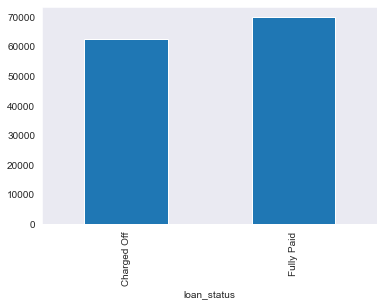

In [80]:
df_ln_trn.groupby('loan_status')['annual_inc'].mean().plot.bar()

In [81]:
df_ln_trn.groupby('loan_status')['annual_inc'].mean()

loan_status
Charged Off    62427.298034
Fully Paid     69862.503328
Name: annual_inc, dtype: float64

In [82]:
#df_ln_trn.annual_inc.describe()

The y-axis represents the mean applicant income.No major change in the mean income for the loan status is observed. 
Let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [83]:
# Annual Income V charge off Proportion
inc_vs_loan = df_ln_trn.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

inc_vs_loan['Total'] = inc_vs_loan['Charged Off'] + inc_vs_loan['Fully Paid'] 
inc_vs_loan['Chargedoff_Proportion'] = inc_vs_loan['Charged Off'] / inc_vs_loan['Total']
inc_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_cats,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,237,943,1180,0.200847
1,20000-40000,1514,7004,8518,0.177741
2,40000-60000,1729,9534,11263,0.153511
3,60000-80000,1024,6597,7621,0.134366
4,80000 +,1122,8859,9981,0.112414


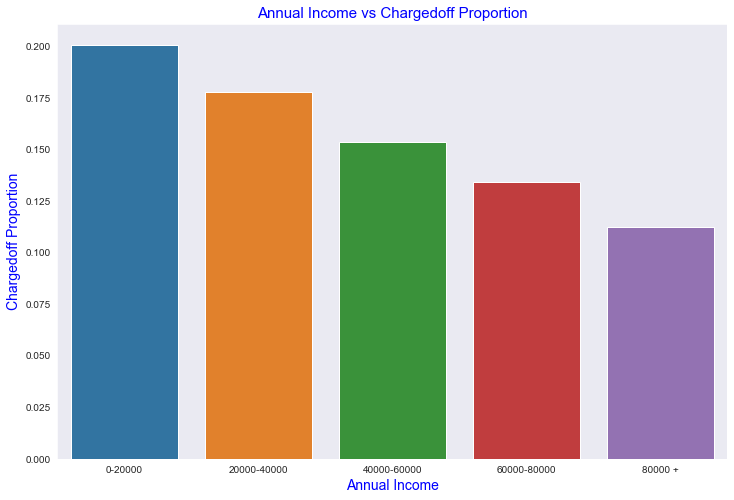

In [84]:
# plot Income vs charged off proportion
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='w')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'b')
ax1=sns.barplot(x='annual_inc_cats', y='Chargedoff_Proportion', data=inc_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'b')
ax1.set_xlabel('Annual Income',fontsize=14,color='b')
plt.show()

In [85]:
# Identify the purpose of loans for the income category (0-20000) where 
# the maximum default has been observed
df_ln_trn_co =df_ln_trn[df_ln_trn.loan_status=='Charged Off']
inc_vs_purpose_co = df_ln_trn_co.groupby(['annual_inc_cats', 'purpose']).purpose.count().unstack().fillna(0).reset_index()

#print(inc_vs_purpose_co)
#inc_vs_loans=inc_vs_loans[()]

#inc_vs_loans
#inc_vs_purpose_co['Total'] = inc_vs_loans['Debt'] + inc_vs_loans['Fully Paid'] 
#inc_vs_loans['Chargedoff_Proportion'] = inc_vs_loans['Charged Off'] / inc_vs_loans['Total']
#inc_vs_loans.sort_values('Chargedoff_Proportion', ascending=False)

In [86]:
inc_vs_pur = df_ln_trn_co.groupby(['annual_inc_cats', 'purpose']).purpose.count().unstack().fillna(0).reset_index()
inc_vs_pur
#inc_vs_pur = df_ln_trn_co.groupby(['annual_inc_cats','purpose']).purpose.count().unstack().fillna(0).reset_index()
inc_vs_pur['Total'] = inc_vs_pur['car'] + inc_vs_pur['credit_card'] + inc_vs_pur['debt_consolidation']+ inc_vs_pur['educational']+ inc_vs_pur['home_improvement']+inc_vs_pur['house']+ inc_vs_pur['major_purchase']+inc_vs_pur['medical']+inc_vs_pur['moving']+inc_vs_pur['other']+inc_vs_pur['renewable_energy']+inc_vs_pur['small_business']+inc_vs_pur['vacation']+inc_vs_pur['wedding']
inc_vs_pur['Prop_dc'] = inc_vs_pur['debt_consolidation'] / inc_vs_pur['Total']
inc_vs_pur['Prop_sb'] = inc_vs_pur['small_business'] / inc_vs_pur['Total']
inc_vs_pur.sort_values('Prop_dc', ascending=False)
inc_vs_pur.sort_values('Prop_sb', ascending=False)

purpose,annual_inc_cats,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Total,Prop_dc,Prop_sb
4,80000 +,27,119,532,10,100,19,32,14,12,114,3,115,5,20,1122,0.474153,0.102496
3,60000-80000,25,113,526,6,73,9,21,24,6,85,5,101,10,20,1024,0.513672,0.098633
2,40000-60000,53,161,882,11,105,14,74,30,24,186,2,139,18,30,1729,0.510121,0.080393
0,0-20000,10,10,81,10,6,2,18,9,10,55,2,17,4,3,237,0.341772,0.071730
1,20000-40000,45,139,745,19,63,15,77,29,40,193,7,103,16,23,1514,0.492074,0.068032


##### Observation : 

Charged Off percentage is less when income of the applicants are above 80000+

It can be inferred that Applicant's income does proportionally impact the loan defaults. The proportion of defaults increase marginally with the decrease in the borrowers income buckets.

0-20000 income has a higher charge off ratio. The maximum loan defaults in this category has happened when the loans were taken for debt_consolidation (34%). This would imply that loans for debt_consolidation are risky for the lending company and should be mitigated with additional measures



#### Bivariate - Interest Rate Vs Charge off Proportion

In [87]:
# Bivariate Analysis on interest rate against Chargedoff_Proportion

interest_vs_loan = df_ln_trn.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off']+ interest_vs_loan['Fully Paid'] 
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_cats,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,16 +,1266,3372,4638,0.272962
2,12.5-16,2003,9470,11473,0.174584
1,10-13,1232,8148,9380,0.131343
0,0-10,830,11486,12316,0.067392


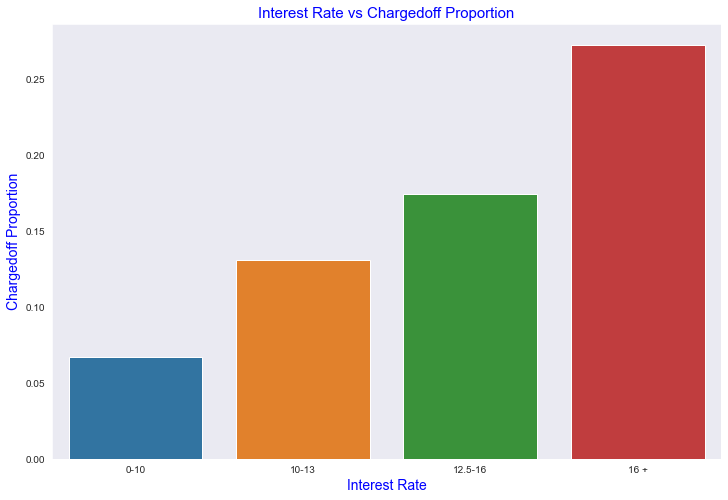

In [88]:
# Lets draw some bar plots on data calculated above and try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='w')
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='b')
ax1=sns.barplot(x='int_rate_cats', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='b')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'b')
plt.show()

##### Observations:

- Charged off percentage is lowest when interest rate is ranging from 0-10

- Charged off percentage is highest when interest rate is above 16%

- Gradual increase is seen in charged off percentage when interest rate increases


#### Bivariate - Funded Amount disbursed Vs Charge off Proportion

In [89]:
# Bivariate Analysis on funded_amnt_inv against Chargedoff_Proportion

fundedamt_vs_loan = df_ln_trn.groupby(['funded_amnt_inv_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
fundedamt_vs_loan['Total'] = fundedamt_vs_loan['Charged Off']+ fundedamt_vs_loan['Fully Paid'] 
fundedamt_vs_loan['Chargedoff_Proportion'] = fundedamt_vs_loan['Charged Off'] / fundedamt_vs_loan['Total']
fundedamt_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,funded_amnt_inv_cats,Charged Off,Fully Paid,Total,Chargedoff_Proportion
4,28000 +,195,720,915,0.213115
3,21000-28000,398,1874,2272,0.175176
2,14000-21000,1072,5334,6406,0.167343
0,0-7000,2169,13432,15601,0.139030
1,7000-14000,1766,11488,13254,0.133243


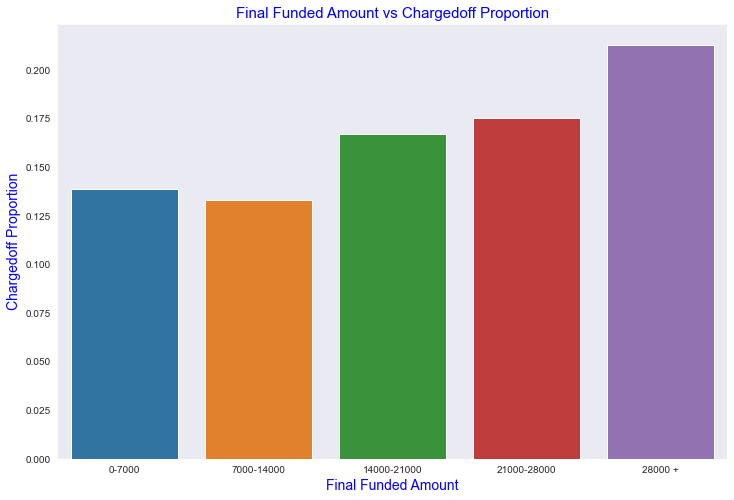

In [90]:
# Lets draw some bar plots on data calculated abovvr and try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='w')
ax1.set_title('Final Funded Amount vs Chargedoff Proportion',fontsize=15,color='b')
ax1=sns.barplot(x='funded_amnt_inv_cats', y='Chargedoff_Proportion', data=fundedamt_vs_loan)
ax1.set_xlabel('Final Funded Amount',fontsize=14,color='b')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'b')
plt.show()

#### Observations:

- Charged off percentage is greater when funded amount is 28000+

- Charged off percentage is lowest when funded amount is ranging between 7K-14K



#### Bivariate - Debt to income Vs Charge off Proportion

In [91]:
# Bivariate Analysis on Debt to Income ratio against Chargedoff_Proportion

dti_vs_loan = df_ln_trn.groupby(['dti_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_vs_loan['Total'] = dti_vs_loan['Charged Off']+ dti_vs_loan['Fully Paid'] 
dti_vs_loan['Chargedoff_Proportion'] = dti_vs_loan['Charged Off'] / dti_vs_loan['Total']
dti_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,dti_cats,Charged Off,Fully Paid,Total,Chargedoff_Proportion
4,25+,1118,5460,6578,0.169960
3,15-20,1389,7422,8811,0.157644
2,10-15,1402,8228,9630,0.145587
1,05-10,1005,6868,7873,0.127651
0,0-5,597,4287,4884,0.122236


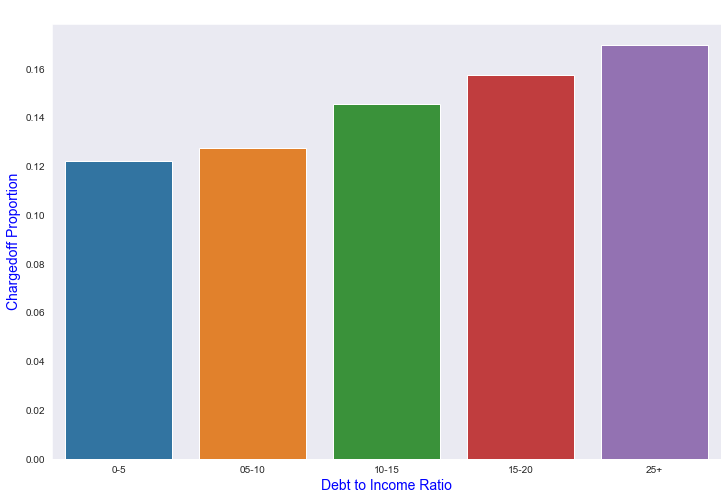

In [92]:
# Lets draw some bar plots on data calculated abovvr and try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='w')
ax1.set_title('Debt to Income Ratio vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='dti_cats', y='Chargedoff_Proportion', data=dti_vs_loan)
ax1.set_xlabel('Debt to Income Ratio',fontsize=14,color='b')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'b')
plt.show()

##### Observations:  

- Charged off percentage is highest when DTI is greater than 25

- Charged off percentage is lowest when DTI is ranging between 0-5

- Gradual increase is seen in charged off percentage when dti increases


#### Bivariate - Debt to income Vs Charge off Proportion


In [93]:
#bivariate open account V charged off proportion

openacc_vs_loan = df_ln_trn.groupby(['open_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
openacc_vs_loan['Total'] = openacc_vs_loan['Charged Off']+ openacc_vs_loan['Fully Paid'] 
openacc_vs_loan['Chargedoff_Proportion'] = openacc_vs_loan['Charged Off'] / openacc_vs_loan['Total']
openacc_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,open_cats,Charged Off,Fully Paid,Total,Chargedoff_Proportion
4,28-35,11,39,50,0.220000
3,21-28,68,370,438,0.155251
0,0-7,2274,12958,15232,0.149291
1,07-14,2692,15972,18664,0.144235
5,35+,1,6,7,0.142857
2,14-21,581,3605,4186,0.138796


##### Observations:
There is no conclusion from this. applicants with 28-35 need to be avoided. However the number of such applicants are low. So no conclusive evidence

We will now try to find the co-relation between all the numerical variables with each other and the loan status target variable. We will use heat maps to visualize this.

In [94]:
# Derieve a new loan status numerical column for further co-relation analysis -

df_ln_trn['loan_status_num'] = df_ln_trn['loan_status'].apply( lambda x: 0 if x == "Charged Off" else 1)

Now let’s look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

In [95]:
#Generating a subset of numerical variables for the heat map
df_ln_trn_ht_map = df_ln_trn[['loan_status_num','annual_inc','dti','inq_last_6mths','open_acc','total_acc','pub_rec','revol_bal','int_rate','revol_util','installment']]
df_ln_trn_ht_map.corr()

,loan_status_num,annual_inc,dti,inq_last_6mths,open_acc,total_acc,pub_rec,revol_bal,int_rate,revol_util,installment
loan_status_num,1.000000,0.040867,-0.045078,-0.071878,0.009140,0.022608,-0.051001,-0.005854,-0.211390,-0.099990,-0.027153
annual_inc,0.040867,1.000000,-0.121530,0.035465,0.156927,0.234534,-0.017864,0.277374,0.048899,0.016707,0.267842
dti,-0.045078,-0.121530,1.000000,0.002178,0.287849,0.229119,-0.004742,0.228090,0.110913,0.278941,0.052038
inq_last_6mths,-0.071878,0.035465,0.002178,1.000000,0.093434,0.113516,0.023726,-0.020787,0.133362,-0.070206,0.011014
open_acc,0.009140,0.156927,0.287849,0.093434,1.000000,0.687260,0.000028,0.288055,0.006022,-0.089923,0.172893
total_acc,0.022608,0.234534,0.229119,0.113516,0.687260,1.000000,-0.023494,0.312634,-0.046539,-0.070650,0.229860
pub_rec,-0.051001,-0.017864,-0.004742,0.023726,0.000028,-0.023494,1.000000,-0.060502,0.098635,0.058942,-0.045706
revol_bal,-0.005854,0.277374,0.228090,-0.020787,0.288055,0.312634,-0.060502,1.000000,0.094179,0.301248,0.309501
int_rate,-0.211390,0.048899,0.110913,0.133362,0.006022,-0.046539,0.098635,0.094179,1.000000,0.467213,0.277203
revol_util,-0.099990,0.016707,0.278941,-0.070206,-0.089923,-0.070650,0.058942,0.301248,0.467213,1.000000,0.093049


<AxesSubplot:>

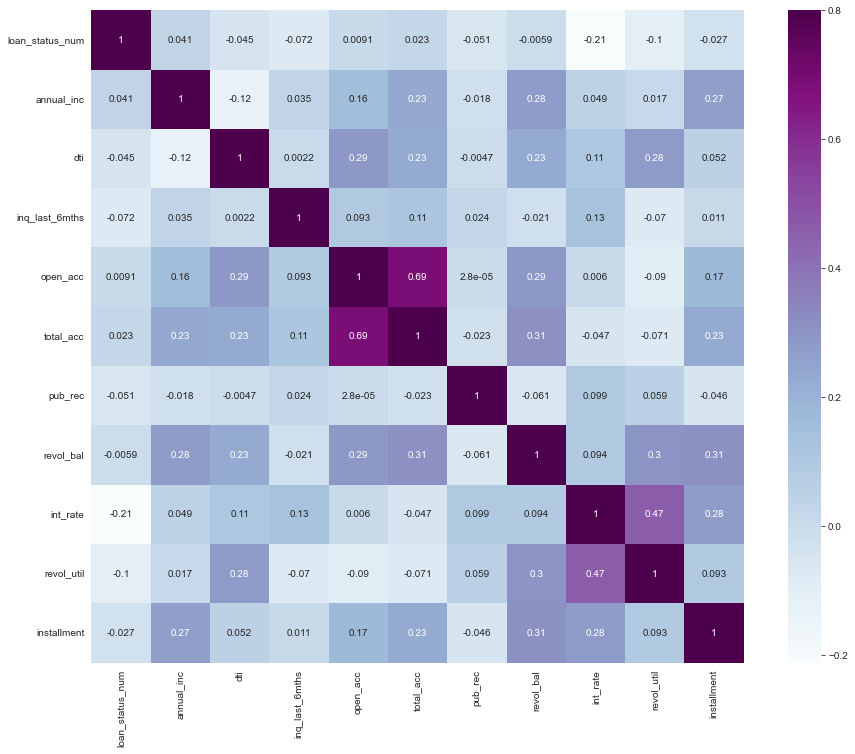

In [96]:
matrix = df_ln_trn_ht_map.corr()
f, ax = plt.subplots(figsize=(16,12))
sns.heatmap(matrix,vmax=.8,square=True,cmap= 'BuPu', annot = True)

#### Observation:  
We see that some slight positive correlations between :
-  open_acc & total_acc at 0.69
-  revol_bal & interest at 0.47
-  revol_bal & Annual Income at 0.42
-  installment and Annual Income at 0.41

We don't see a strong negative correlations between the variables


### Summary of Recomendations

- Continue giving loans to Grade A applicants.  Avoid Grade F applicants  
- Loans Provided to higher income applicants are relatively safer
- Reduce giving loans to applicants who borrow the money to start a small business 
- Avoid giving loans to those who have publicly known bankruptcy records. Higher the number greater the chance of default
- The lower the loan duration, the lesser the risk
- Avoid giving loans to applicants with income group 0-20000 whose loan purpose is for debt consolidation  
- Reduce giving loans to applicants with 20000-60000 income with debt consolidation as purpose of loan as it accounts for 50% default 
- Verification expenses can be avoided as they seem to make no impact on charge offs
- Avoid giving loans to applicants with DTI greater than 25
- Reduce giving loans greater than 28000. Success rate is highest between 7k-14k!